# Data pre-processing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("data/HCV-Egy-Data.csv")

In [3]:
data.head()

Age  Gender  BMI  Fever  Nausea/Vomting  Headache  Diarrhea  \
0   56       1   35      2               1         1         1   
1   46       1   29      1               2         2         1   
2   57       1   33      2               2         2         2   
3   49       2   33      1               2         1         2   
4   59       1   32      1               1         2         1   

   Fatigue & generalized bone ache  Jaundice  Epigastric pain  ...  ALT 36  \
0                                2         2                2  ...       5   
1                                2         2                1  ...      57   
2                                1         1                1  ...       5   
3                                1         2                1  ...      48   
4                                2         2                2  ...      94   

   ALT 48  ALT after 24 w  RNA Base   RNA 4   RNA 12  RNA EOT  RNA EF  \
0       5               5    655330  634536   288194        5       5   
1     123              44     40620  538635   637056   336804   31085   
2       5               5    571148  661346        5   735945  558829   
3      77              33   1041941  449939   585688   744463  582301   
4      90              30    660410  738756  3731527   338946  242861   

   Baseline histological Grading  Baselinehistological staging  
0                             13                             2  
1                              4                             2  
2                              4                             4  
3                             10                             3  
4                             11                             1  

[5 rows x 29 columns]

In [4]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [5]:
#Rename Columns
data.columns=['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting','Headache ',
       'Diarrhea','Fatigue','Jaundice',
       'Epigastric_pain ', 'WBC','RBC','HGB', 'Plat','AST_1','ALT_1',
       'ALT_4', 'ALT_12','ALT_24','ALT_36','ALT_48','ALT_after_24w',
       'RNA_Base','RNA 4','RNA_12', 'RNA_EOT','RNA_EF',
       'Baseline_histological_Grading','Baselinehistological_staging']

In [6]:
#Remove spaces at the ends of column names to avoid any further errors:
data.columns = data.columns.str.strip()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1385 non-null   int64  
 1   Gender                         1385 non-null   int64  
 2   BMI                            1385 non-null   int64  
 3   Fever                          1385 non-null   int64  
 4   Nausea/Vomting                 1385 non-null   int64  
 5   Headache                       1385 non-null   int64  
 6   Diarrhea                       1385 non-null   int64  
 7   Fatigue                        1385 non-null   int64  
 8   Jaundice                       1385 non-null   int64  
 9   Epigastric_pain                1385 non-null   int64  
 10  WBC                            1385 non-null   int64  
 11  RBC                            1385 non-null   float64
 12  HGB                            1385 non-null   i

In [8]:
data.describe()

Age       Gender          BMI        Fever  Nausea/Vomting  \
count  1385.000000  1385.000000  1385.000000  1385.000000     1385.000000   
mean     46.319134     1.489531    28.608664     1.515523        1.502527   
std       8.781506     0.500071     4.076215     0.499939        0.500174   
min      32.000000     1.000000    22.000000     1.000000        1.000000   
25%      39.000000     1.000000    25.000000     1.000000        1.000000   
50%      46.000000     1.000000    29.000000     2.000000        2.000000   
75%      54.000000     2.000000    32.000000     2.000000        2.000000   
max      61.000000     2.000000    35.000000     2.000000        2.000000   

          Headache     Diarrhea      Fatigue     Jaundice  Epigastric_pain  \
count  1385.000000  1385.000000  1385.000000  1385.000000      1385.000000   
mean      1.496029     1.502527     1.498917     1.501083         1.503971   
std       0.500165     0.500174     0.500179     0.500179         0.500165   
min       1.000000     1.000000     1.000000     1.000000         1.000000   
25%       1.000000     1.000000     1.000000     1.000000         1.000000   
50%       1.000000     2.000000     1.000000     2.000000         2.000000   
75%       2.000000     2.000000     2.000000     2.000000         2.000000   
max       2.000000     2.000000     2.000000     2.000000         2.000000   

       ...       ALT_36       ALT_48  ALT_after_24w      RNA_Base  \
count  ...  1385.000000  1385.000000    1385.000000  1.385000e+03   
mean   ...    83.117690    83.629603      33.438267  5.909512e+05   
std    ...    26.399031    26.223955       7.073569  3.539354e+05   
min    ...     5.000000     5.000000       5.000000  1.100000e+01   
25%    ...    61.000000    61.000000      28.000000  2.692530e+05   
50%    ...    84.000000    83.000000      34.000000  5.931030e+05   
75%    ...   106.000000   106.000000      40.000000  8.867910e+05   
max    ...   128.000000   128.000000      45.000000  1.201086e+06   

              RNA 4        RNA_12        RNA_EOT         RNA_EF  \
count  1.385000e+03  1.385000e+03    1385.000000    1385.000000   
mean   6.008956e+05  2.887536e+05  287660.336462  291378.290975   
std    3.623151e+05  2.853507e+05  264559.525070  267700.691713   
min    5.000000e+00  5.000000e+00       5.000000       5.000000   
25%    2.708930e+05  5.000000e+00       5.000000       5.000000   
50%    5.978690e+05  2.343590e+05  251376.000000  244049.000000   
75%    9.090930e+05  5.248190e+05  517806.000000  527864.000000   
max    1.201715e+06  3.731527e+06  808450.000000  810333.000000   

       Baseline_histological_Grading  Baselinehistological_staging  
count                    1385.000000                   1385.000000  
mean                        9.761733                      2.536462  
std                         4.023896                      1.121392  
min                         3.000000                      1.000000  
25%                         6.000000                      2.000000  
50%                        10.000000                      3.000000  
75%                        13.000000                      4.000000  
max                        16.000000                      4.000000  

[8 rows x 29 columns]

In [9]:
#check for missing values
data.isnull().sum().sum()

np.int64(0)

In [10]:
#Change the classes columns to categorical for better visualization 

#categorize columns: Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice
data_cat=data[['Gender','Fever','Nausea/Vomting','Headache','Fatigue','Jaundice','Diarrhea','Epigastric_pain',"Baselinehistological_staging"]]

In [11]:
data_cat.head()

Gender  Fever  Nausea/Vomting  Headache  Fatigue  Jaundice  Diarrhea  \
0       1      2               1         1        2         2         1   
1       1      1               2         2        2         2         1   
2       1      2               2         2        1         1         2   
3       2      1               2         1        1         2         2   
4       1      1               1         2        2         2         1   

   Epigastric_pain  Baselinehistological_staging  
0                2                             2  
1                1                             2  
2                1                             4  
3                1                             3  
4                2                             1

In [12]:
data_cat=data_cat.astype('category')

In [13]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        1385 non-null   category
 1   Fever                         1385 non-null   category
 2   Nausea/Vomting                1385 non-null   category
 3   Headache                      1385 non-null   category
 4   Fatigue                       1385 non-null   category
 5   Jaundice                      1385 non-null   category
 6   Diarrhea                      1385 non-null   category
 7   Epigastric_pain               1385 non-null   category
 8   Baselinehistological_staging  1385 non-null   category
dtypes: category(9)
memory usage: 13.5 KB


In [14]:
#Replacing the values to names e.g. 1:Male,2:Female 1:Absent,2:present 
data_cat['Gender'].replace([1,2],['Male','Female'],inplace=True)
data_cat['Gender']

0         Male
1         Male
2         Male
3       Female
4         Male
         ...  
1380      Male
1381      Male
1382      Male
1383      Male
1384    Female
Name: Gender, Length: 1385, dtype: object

In [15]:
#check for the unique values for the other columns(Symptoms):
Symptoms_cols=data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']]

Symptoms_cols_values = data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']].values
unique_values =  np.unique(Symptoms_cols_values)

print(unique_values)

[1 2]


In [16]:
#Replacing values (1-2) to (Absent,Present) in Symptoms Features:

data_cat['Fever'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Nausea/Vomting'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Headache'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Fatigue'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Jaundice'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Diarrhea'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Epigastric_pain'].replace([1,2],['Absent','Present'],inplace=True)

In [10]:
#Doing the same for Histological Staging
data_cat['Baselinehistological_staging'].unique()

NameError: name 'data_cat' is not defined

In [18]:
data_cat['Baselinehistological_staging'].replace([1,2,3,4],['Portal Fibrosis','Few Septa','Many Septa','Cirrhosis'],inplace=True)

In [19]:
data_cat.head()

Gender    Fever Nausea/Vomting Headache  Fatigue Jaundice Diarrhea  \
0    Male  Present         Absent   Absent  Present  Present   Absent   
1    Male   Absent        Present  Present  Present  Present   Absent   
2    Male  Present        Present  Present   Absent   Absent  Present   
3  Female   Absent        Present   Absent   Absent  Present  Present   
4    Male   Absent         Absent  Present  Present  Present   Absent   

  Epigastric_pain Baselinehistological_staging  
0         Present                    Few Septa  
1          Absent                    Few Septa  
2          Absent                    Cirrhosis  
3          Absent                   Many Septa  
4         Present              Portal Fibrosis

# 1st Part: EDA

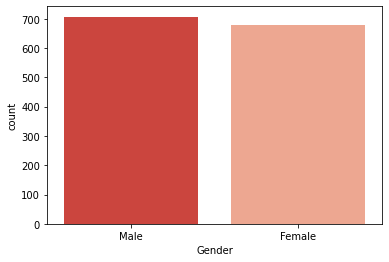

In [20]:
#Gain insights of the categorical data:
sns.countplot(data_cat['Gender'],palette="Reds_r")
plt.show()

In [11]:
data['Gender'].value_counts()

Gender
1    707
2    678
Name: count, dtype: int64

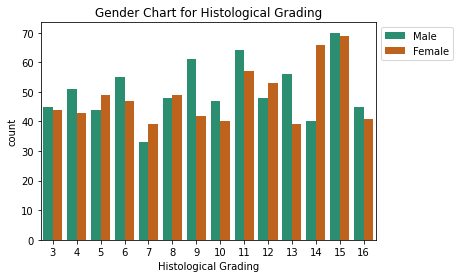

In [22]:
#check Histological Grading and Staging across each Gender

sns.countplot(x=data['Baseline_histological_Grading'],hue=data_cat['Gender'],palette="Dark2")
plt.title("Gender Chart for Histological Grading")
plt.xlabel("Histological Grading")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

it seems that most of the cases are in the 15th Grade, also the least are in the 7th Grade

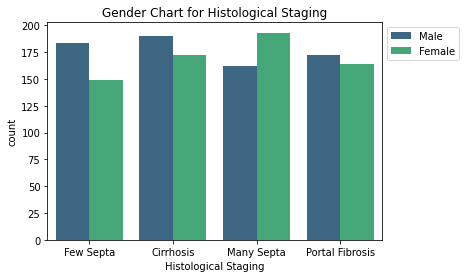

In [23]:
#Histological Stages across each Gender
sns.countplot(x=data_cat['Baselinehistological_staging'],hue=data_cat['Gender'],palette="viridis")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Gender Chart for Histological Staging")
plt.xlabel("Histological Staging")
plt.show()

In [24]:
data_cat['Histological Stages']=data_cat['Baselinehistological_staging']
data_cat['Histological Gradings']=data['Baseline_histological_Grading']

# Visualization for the Symptoms Features and Histological (Grading&Staging)

## Symptoms vs Histological stages across Gender

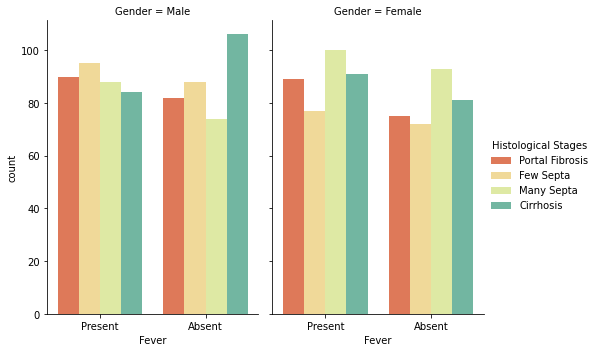

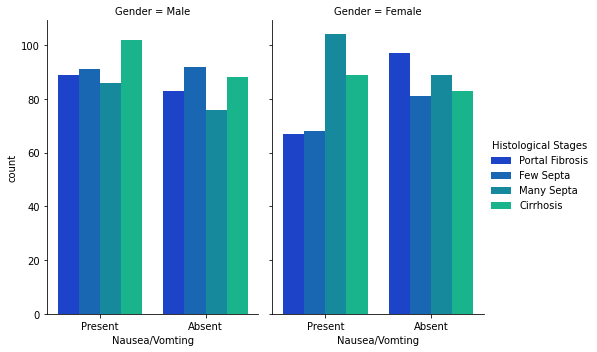

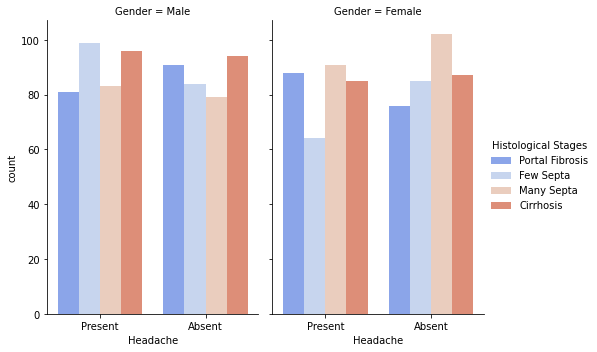

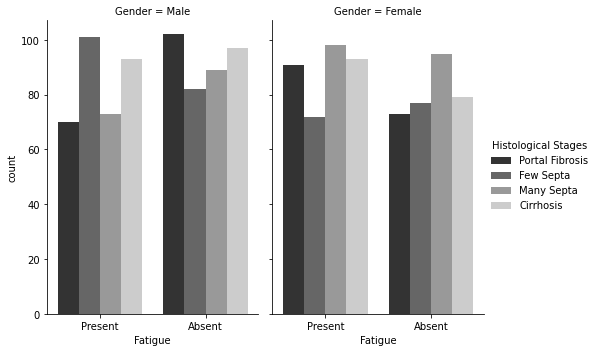

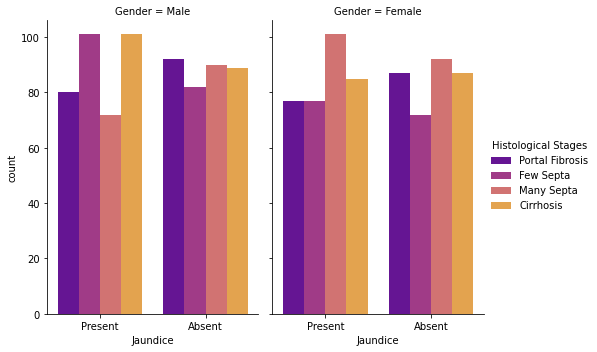

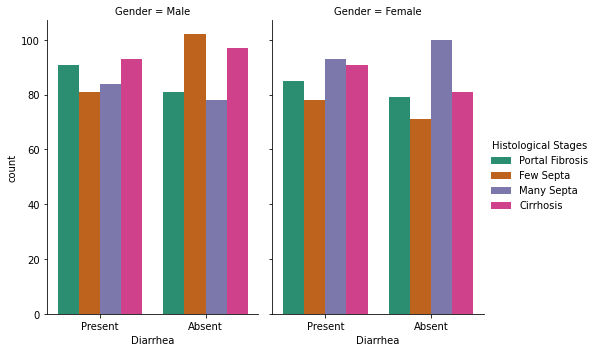

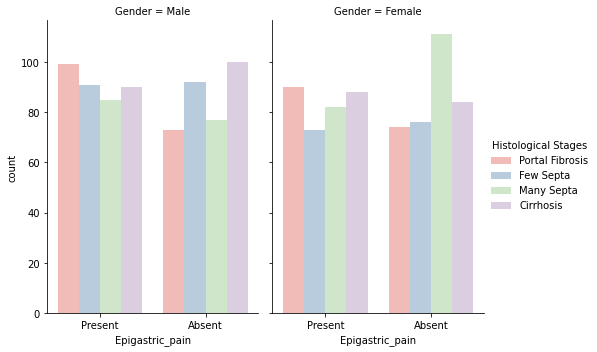

In [25]:
#parameters
order=['Present','Absent']
h_order=['Portal Fibrosis','Few Septa', 'Many Septa', 'Cirrhosis']
height=5
asp=0.7
palette=['winter','Spectral','coolwarm','gist_gray','plasma','Dark2','Pastel1']

#plots
FeverPltS = sns.catplot(x="Fever", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[1])

NauseaPltS =sns.catplot(x="Nausea/Vomting", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[0])


HeadachePltS =sns.catplot(x="Headache", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[2])


FatiguePltS =sns.catplot(x="Fatigue", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[3])


JaundicePltS =sns.catplot(x="Jaundice", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[4])



DiarrheaPltS =sns.catplot(x="Diarrhea", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[5])


Epigastric_painPltS =sns.catplot(x="Epigastric_pain", hue="Histological Stages", col="Gender",
                data=data_cat, kind="count",
                 height=height, aspect=asp,order=order,hue_order=h_order,palette=palette[6])

## Symptoms vs Histological Gradings across Gender

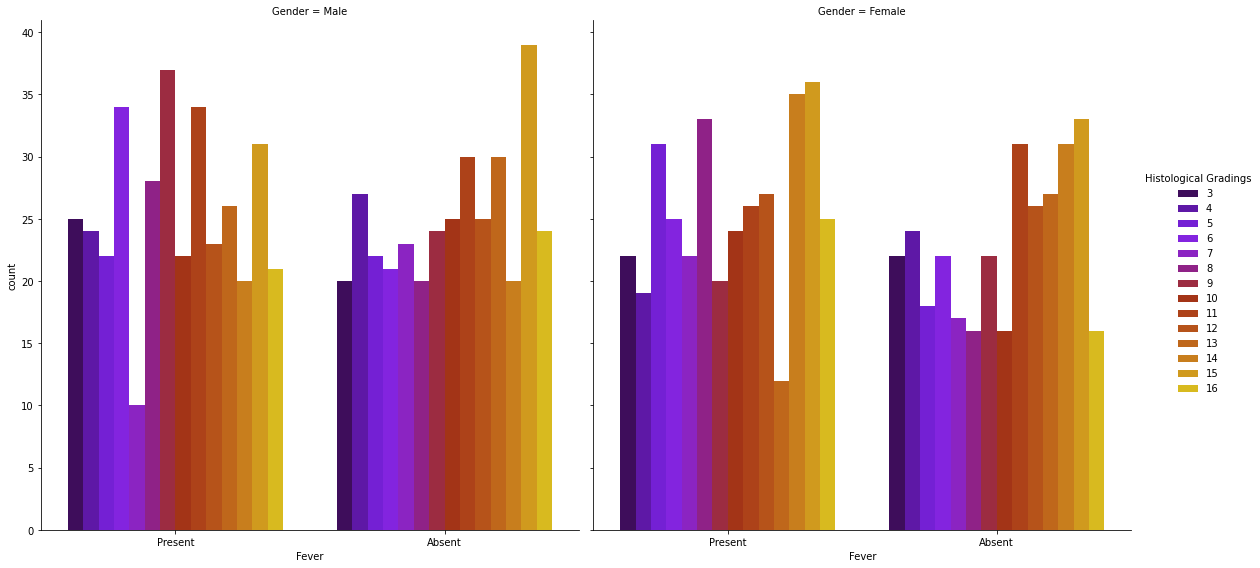

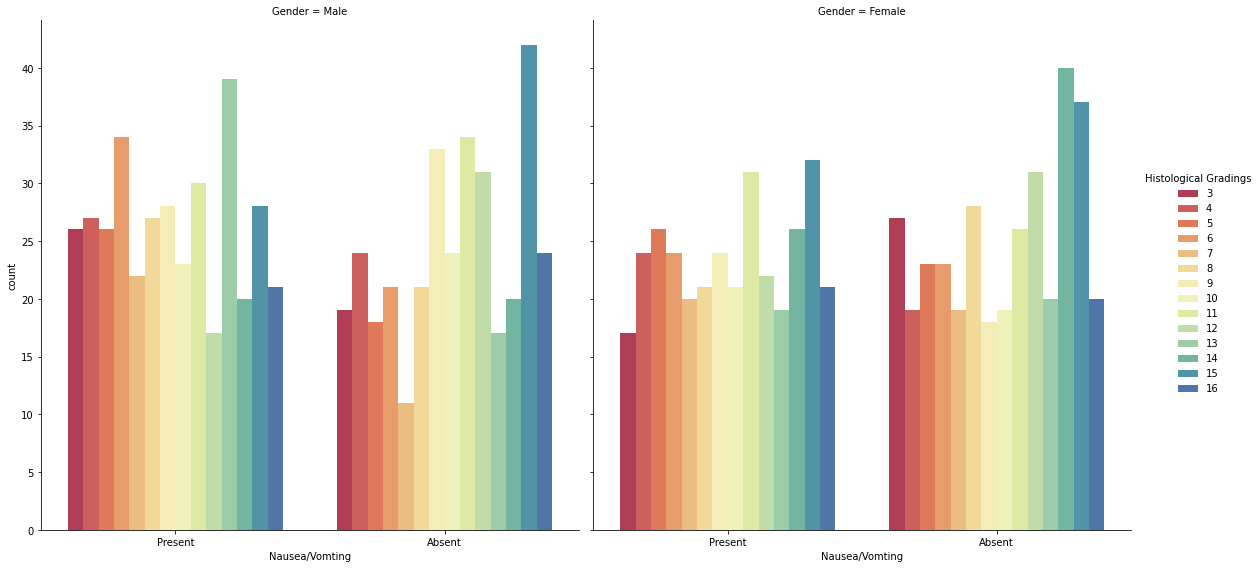

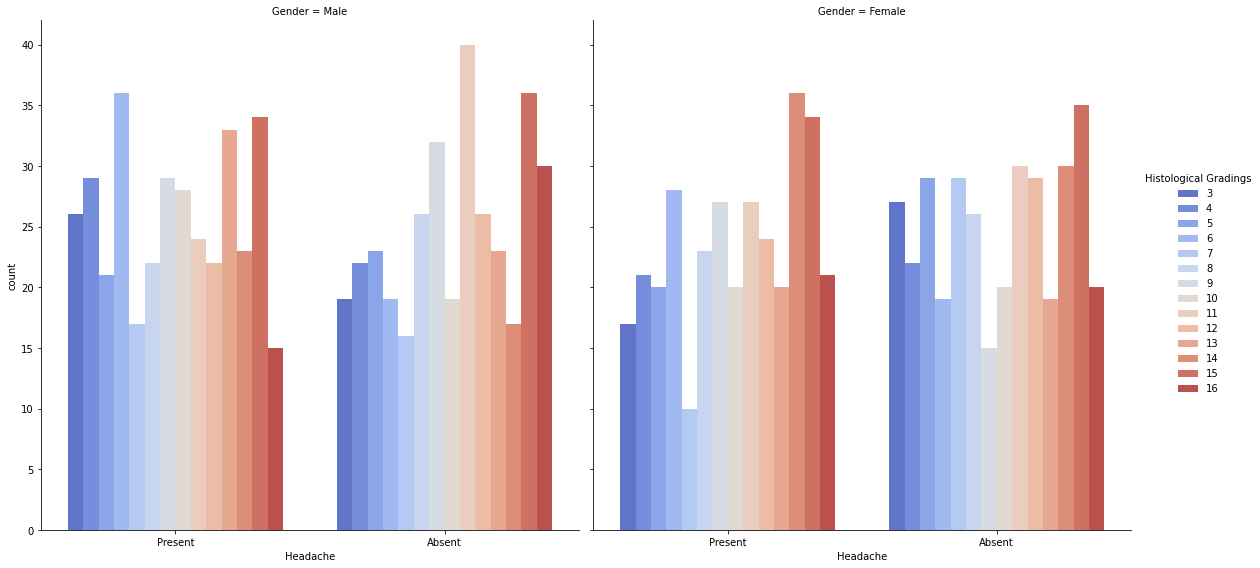

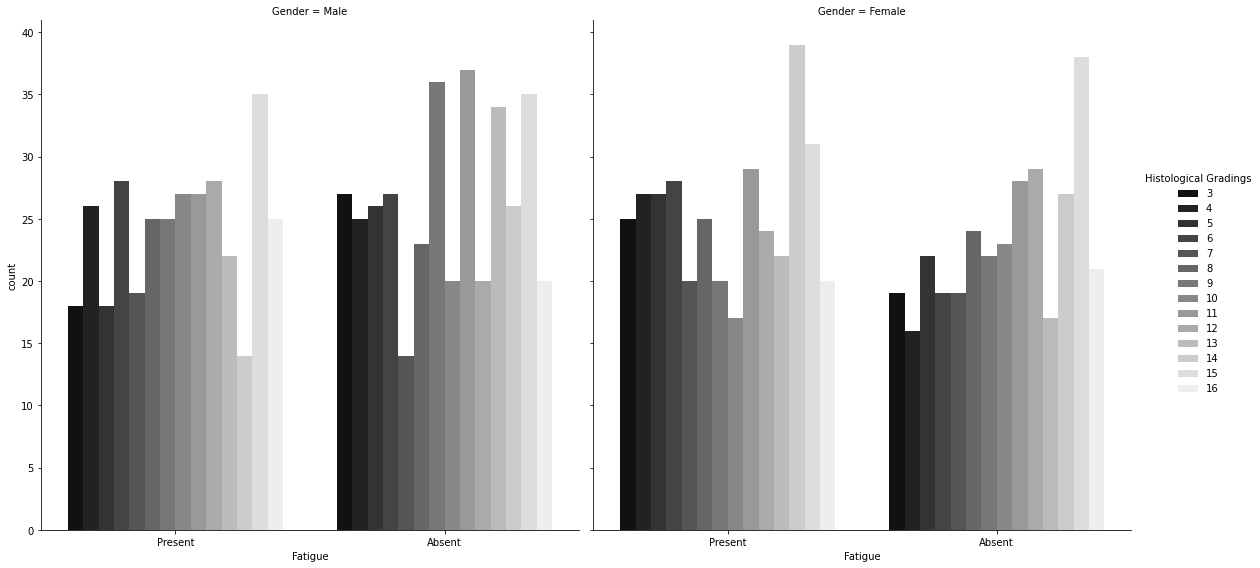

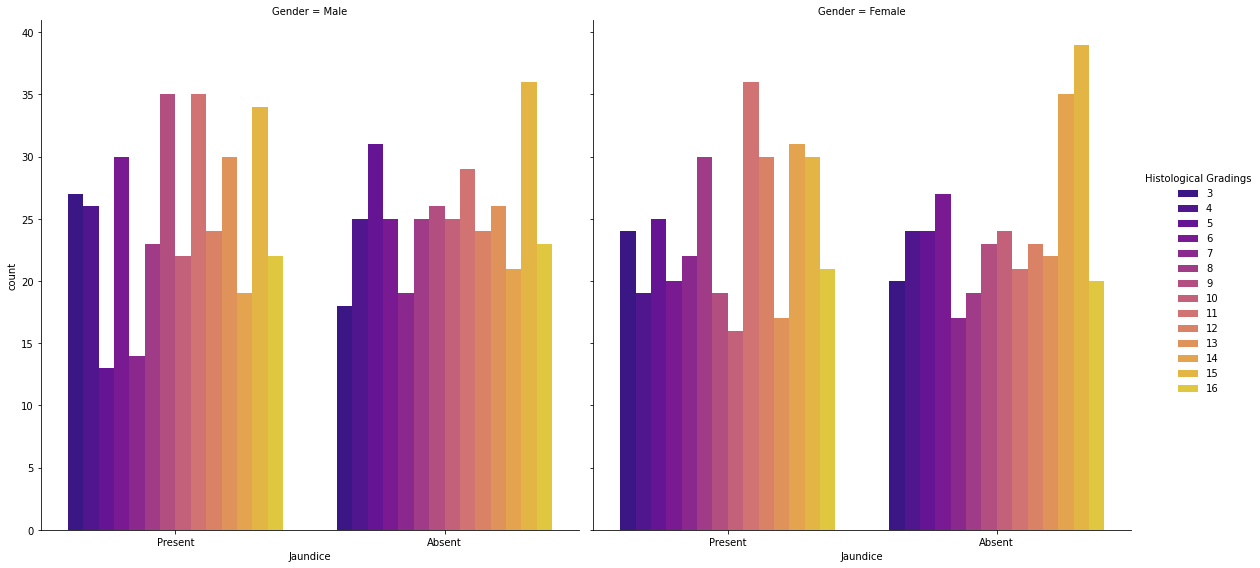

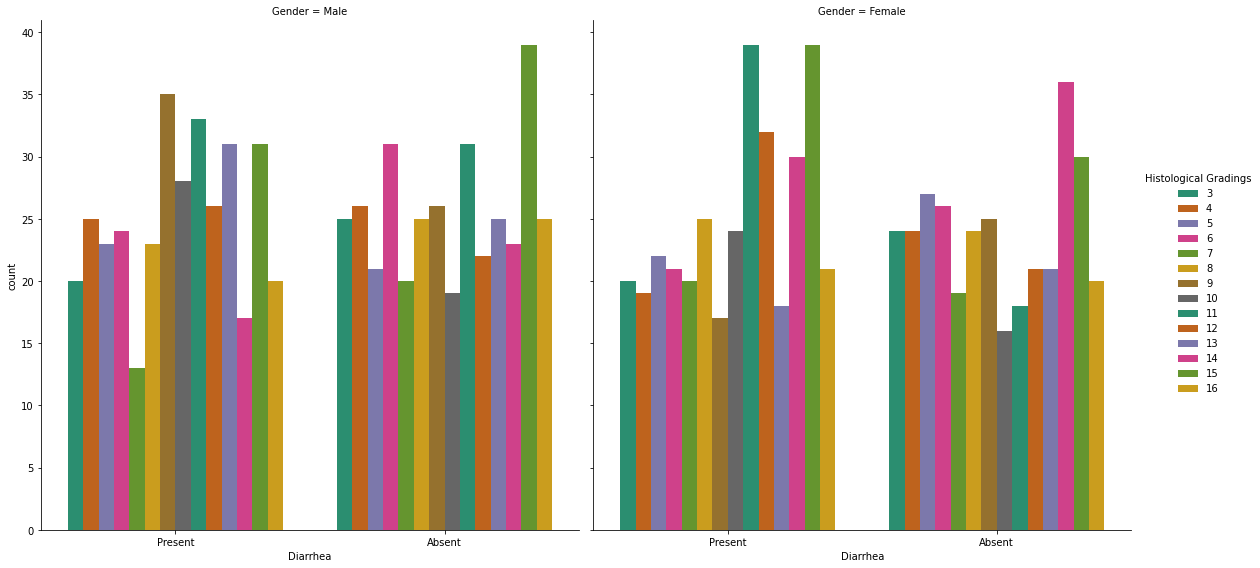

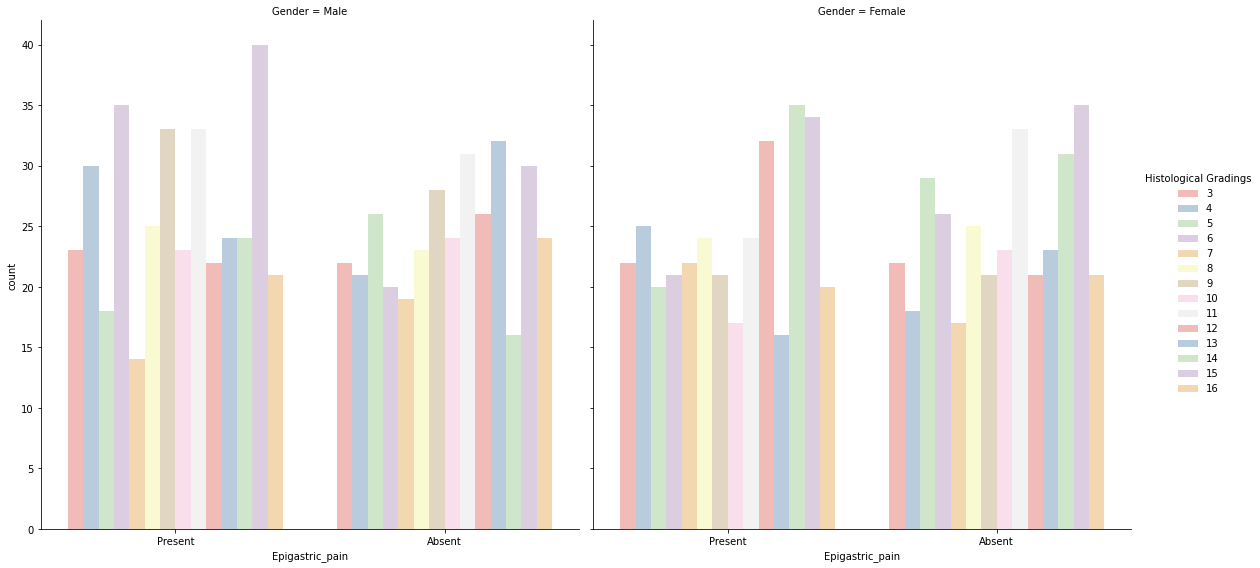

In [26]:
#parameters
order=['Present','Absent']
height=8
asp=1
palette=['winter','Spectral','coolwarm','gist_gray','plasma','Dark2','Pastel1']

#plots
FeverPltG = sns.catplot(x="Fever", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette="gnuplot")

NauseaPltG = sns.catplot(x="Nausea/Vomting", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[1])

HeadachePltG = sns.catplot(x="Headache", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[2])

FatiguePltG = sns.catplot(x="Fatigue", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[3])

JaundicePltG = sns.catplot(x="Jaundice", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[4],)

DiarrheaPltG = sns.catplot(x="Diarrhea", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[5],)

Epigastric_painPltG = sns.catplot(x="Epigastric_pain", hue="Histological Gradings", col="Gender",
                data=data_cat, kind="count",
                height=height, aspect=asp,order=order,palette=palette[6],)

# Distribution of Age

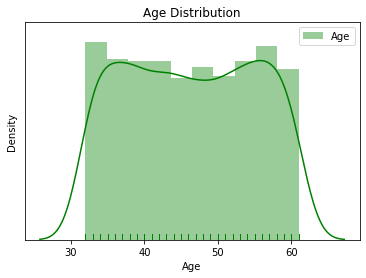

In [27]:
#Age distrubtion across the dataset

sns.distplot(data.Age,bins=10,label="Age",color="green",rug=True)
plt.yticks([])
plt.title("Age Distribution")
plt.legend()
plt.show()

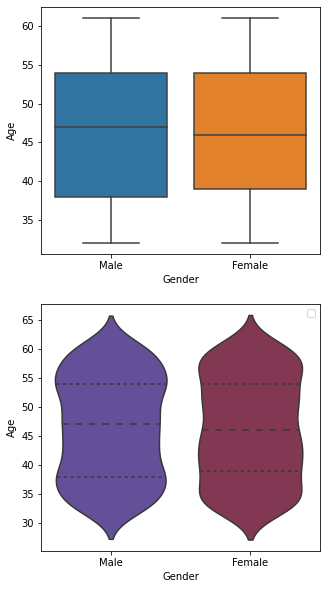

In [28]:
#Age with Gender
fig,axis=plt.subplots(2,1,figsize=(5,10))

sns.boxplot(x=data_cat["Gender"],y=data['Age'],ax=axis[0])
sns.violinplot(x=data_cat["Gender"],y=data['Age'],inner="quartile",bandwidth=0.2, ax=axis[1],palette='twilight')

plt.legend(bbox_to_anchor=(1,1))
plt.show()

The age of the patients varies between 35-60 with max. denisty in the 40-60 range with a slight diffrence in the median value (around 45) patients for both genders seems to have the same age distribution

# Liver Enzymes:

## Alanine Transaminase across each week of weeks(1,4,12,36,48)

## Aspartate Transaminase

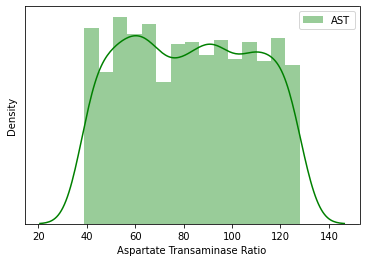

<Figure size 432x288 with 0 Axes>

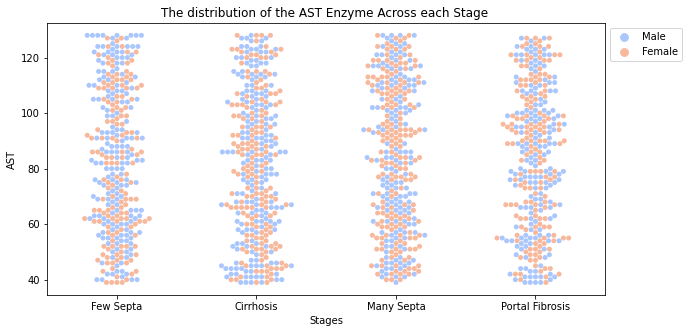

<Figure size 432x288 with 0 Axes>

In [29]:
#Aspartate Transminase distribution:

AST=data['AST_1']

sns.distplot(AST,bins=15,label="AST",color="green")
plt.xlabel("Aspartate Transaminase Ratio")
plt.yticks([])
plt.legend()
plt.show()
plt.savefig("ASTdist.png")

#AST vs Stages
plt.figure(figsize=(10,5))
sns.swarmplot(y=data['AST_1'],x=data_cat['Baselinehistological_staging'],hue=data_cat.Gender,palette="coolwarm")
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Stages")
plt.ylabel("AST")
plt.title("The distribution of the AST Enzyme Across each Stage ")
plt.show()
plt.savefig("ASTstages.png")

the AST enzyme distribution across each Histological Stage shows remmarkable diffrence with Gender

# Aspartate Transminase Relation with :

## WBC (White blood cell)
## RBC (red blood cells)
## HGB (Hemoglobin)
## Plat (Platelets)

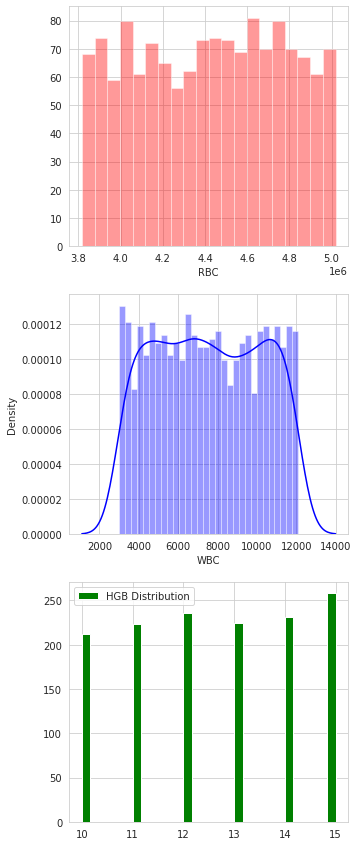

In [30]:
#check the disribution of RBC,WBC and HGB
sns.set_style('whitegrid')

fig,axis=plt.subplots(3,1,figsize=(5,15))

RBCplt=sns.distplot(data['RBC'], kde = False, color ='red', bins = 20,ax=axis[0],label="RBC Distribution") 
WBCplt=sns.distplot(data['WBC'], kde = True, color ='blue', bins = 30,ax=axis[1],label="WBC Distribution")
HGBplt=plt.hist(data['HGB'] ,bins=30,label="HGB Distribution",color="green")


plt.legend()
plt.show()

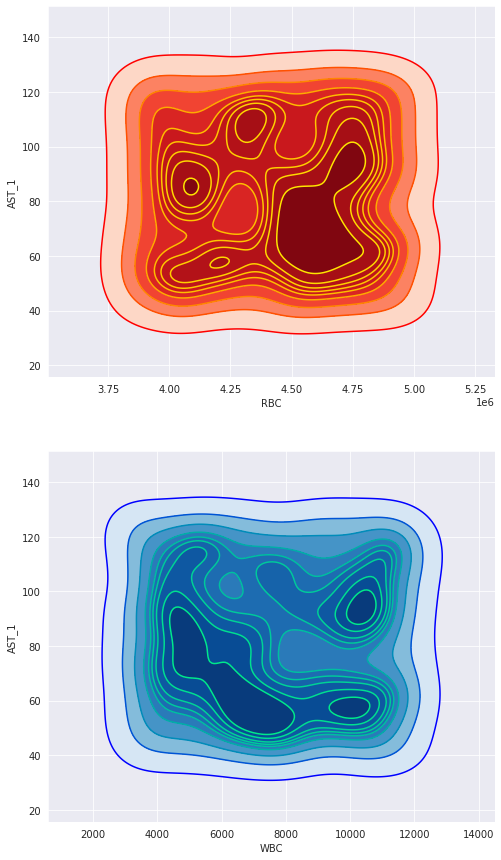

In [31]:
#AST vs RBC & WBC 
sns.set_style("darkgrid")
fig,axis=plt.subplots(2,1,figsize=(8,15))

RBCASTplt=sns.kdeplot(data['RBC'],data['AST_1'],cmap="Reds",shade=True,shade_lowest=False,ax=axis[0])
RBCASTpltcontour=sns.kdeplot(data['RBC'],data['AST_1'],cmap="autumn",ax=axis[0])

WBCASTplt=sns.kdeplot(data['WBC'],data['AST_1'],cmap="Blues",shade=True,shade_lowest=False,ax=axis[1])
WBCASTpltcontour=sns.kdeplot(data['WBC'],data['AST_1'],cmap="winter",ax=axis[1])



plt.show()



The RBC Disribution across the AST enzyme is quiet concentrated at the values within range (40-100) with about range (40m-48m) RBC

While the WBC Distributed at values within range(4k-15k)WBC


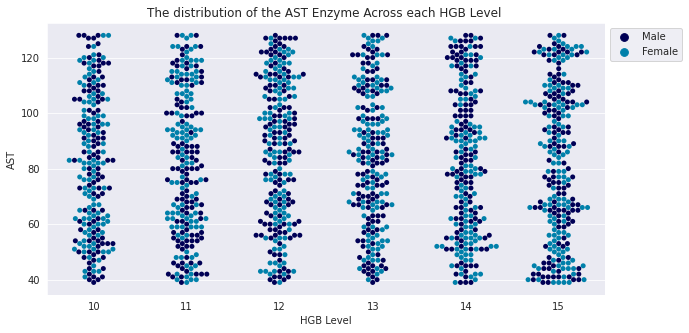

<Figure size 432x288 with 0 Axes>

In [32]:
# AST VS HGB(Blood Hemoglobin level) across Gender:
plt.figure(figsize=(10,5))

sns.swarmplot(y=data['AST_1'],x=data['HGB'],hue=data_cat.Gender,palette="ocean")

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("HGB Level")
plt.ylabel("AST")
plt.title("The distribution of the AST Enzyme Across each HGB Level ")

plt.show()
plt.savefig('asthgb.png')

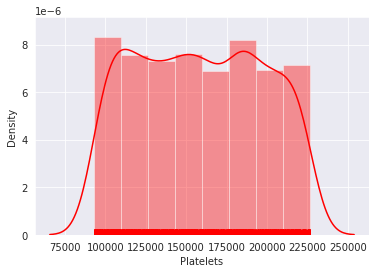

In [33]:
#plat distribution 
sns.distplot(data.Plat,bins=8,axlabel="Platelets",rug=True,color='red')
plt.show()

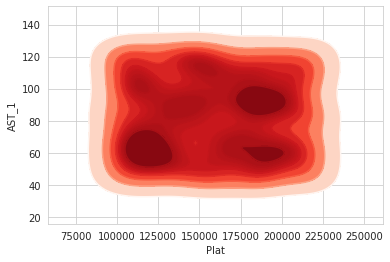

In [34]:
#AST V PLAT
sns.set_style('whitegrid')
WBCASTplt=sns.kdeplot(data['Plat'],data['AST_1'],cmap="Reds",shade=True,shade_lowest=False)
WBCASTpltcontour=sns.kdeplot(data['Plat'],data['AST_1'],cmap="Reds")

plt.show()

# Alanine Transaminase across each week of weeks(1,4,12,36,48)

In [35]:
ALTdata=data[['ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36','ALT_48', 'ALT_after_24w']]
ALTdata

ALT_1  ALT_4  ALT_12  ALT_24  ALT_36  ALT_48  ALT_after_24w
0        84   52.0     109      81       5       5              5
1       123   95.0      75     113      57     123             44
2        49   95.0     107     116       5       5              5
3        64  109.0      80      88      48      77             33
4       104   67.0      48     120      94      90             30
...     ...    ...     ...     ...     ...     ...            ...
1380     59   78.0     106     127      63      44             45
1381    102   65.0      99     108      97      64             41
1382     93  123.0      61     116      87      39             24
1383     97  104.0      74      47      48      81             43
1384    126   39.0      68     115      64      71             34

[1385 rows x 7 columns]

In [36]:
ALTdata.columns=['ALT WEEK 1','ALT WEEK 4','ALT WEEK 12','ALT WEEK 24','ALT WEEK 36','ALT WEEK 48',"'ALT after 24 WEEKs '"]

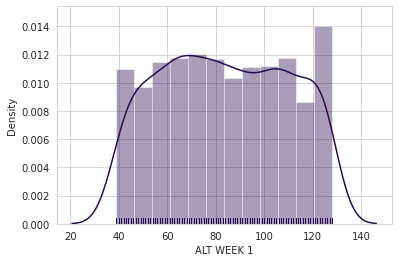

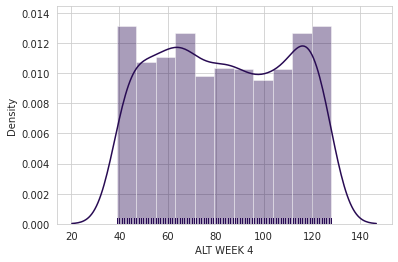

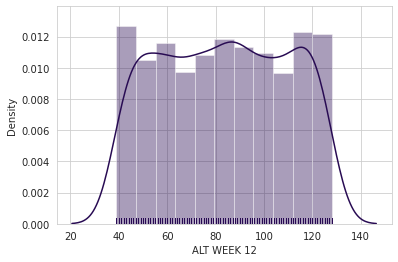

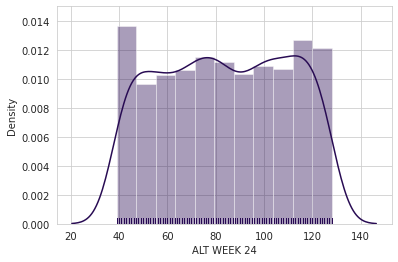

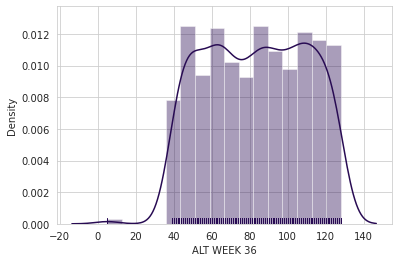

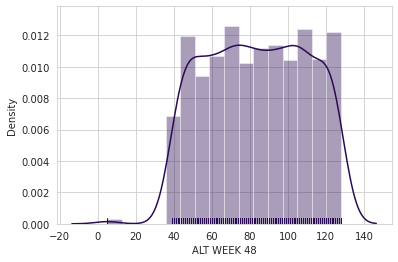

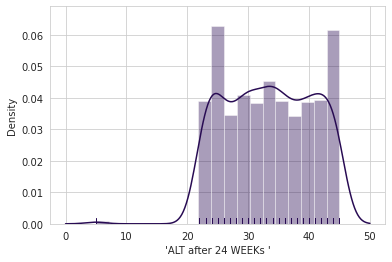

In [37]:
#ALT Enzyme distribution across each week
sns.set_palette(palette="inferno")

for i, col in enumerate(ALTdata.columns):
    plt.figure(i)
    sns.distplot(ALTdata[col],rug=True)

# Distribution for ALT (per each week) and [stages,grading,HBG] for both gender

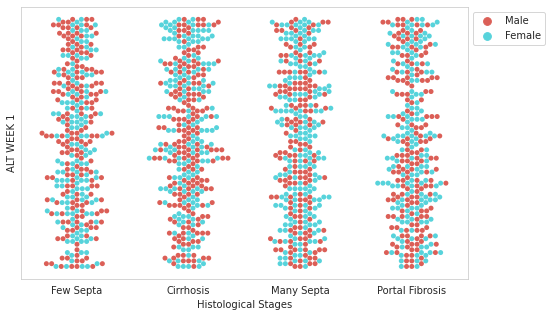

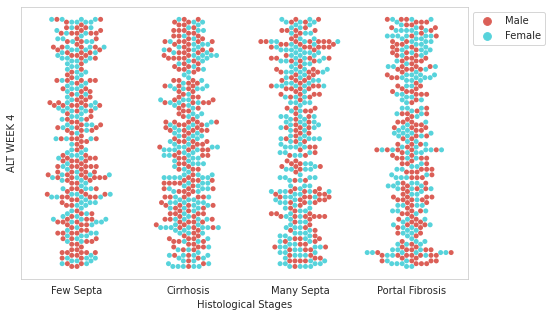

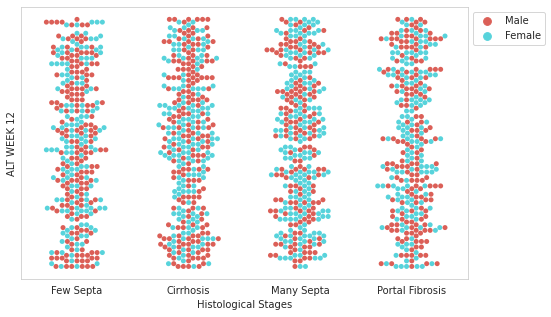

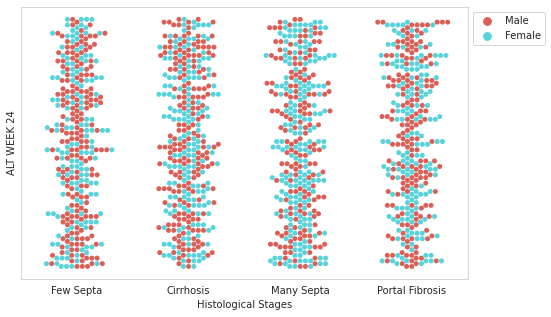

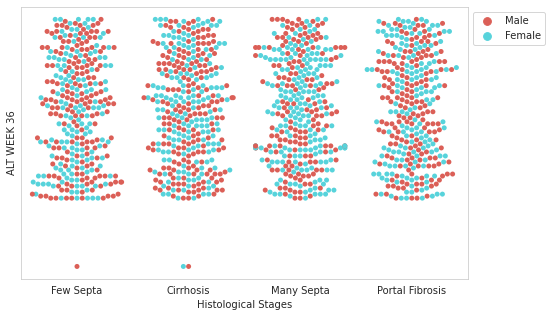

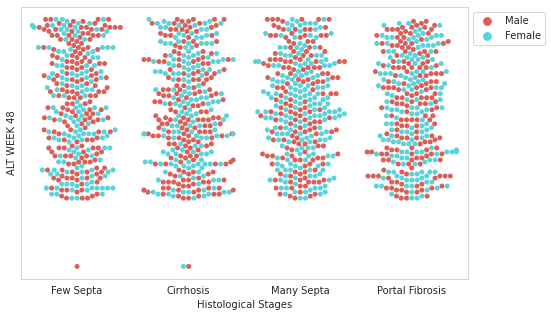

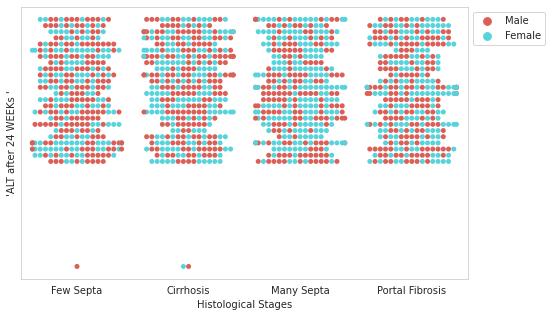

In [38]:
#ALT WEEKS V stages
def ALTSwarmPlot(data,x,hue,figsize,palette):
    for i, col in enumerate(ALTdata.columns):
        plt.figure(i,figsize=figsize)
        sns.swarmplot(y=ALTdata[col],x=x,hue=hue,palette=palette)
        plt.yticks([])
        plt.legend(bbox_to_anchor=(1,1))
ALTSwarmPlot(data=ALTdata,x=data_cat['Histological Stages'], figsize=((8,5)),hue=data_cat['Gender'],palette="hls")

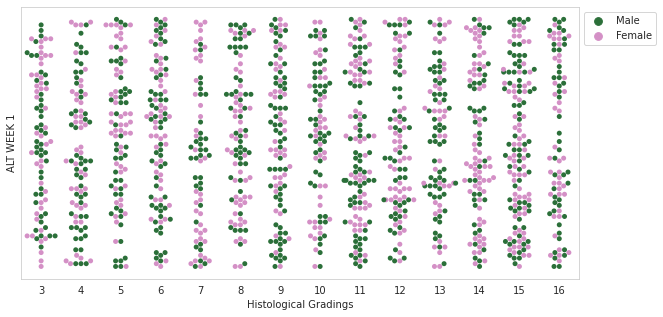

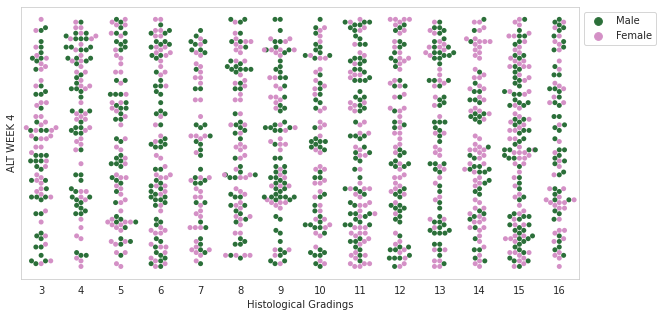

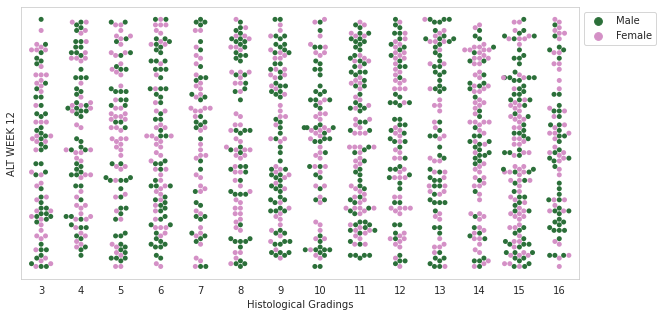

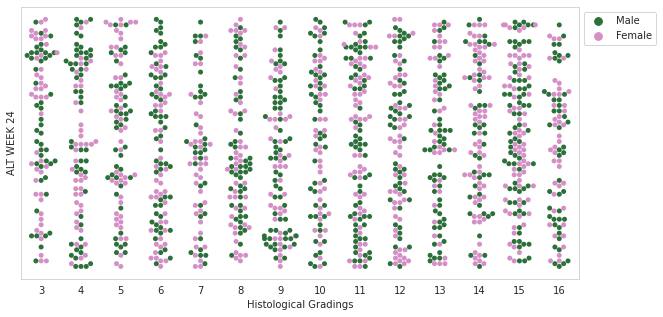

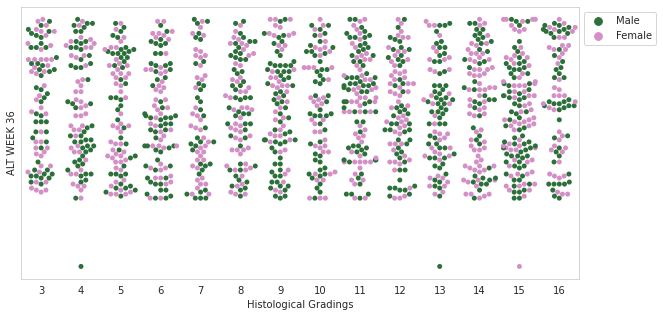

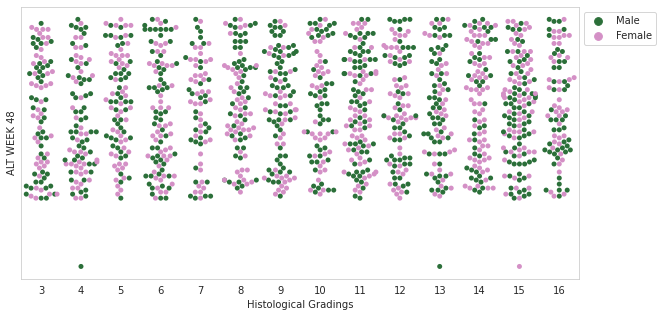

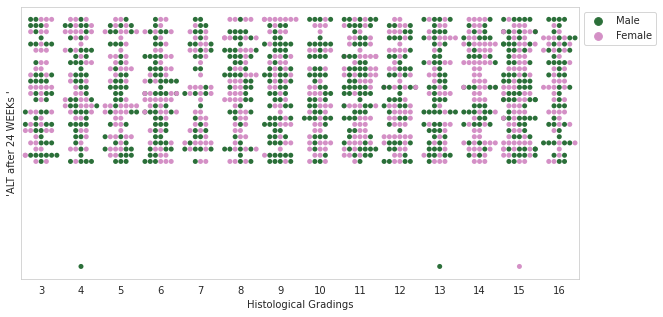

In [39]:
#ALT WEEKS V Grades
ALTSwarmPlot(data=ALTdata,x=data_cat['Histological Gradings'],figsize=(10,5),hue=data_cat['Gender'],palette="cubehelix")

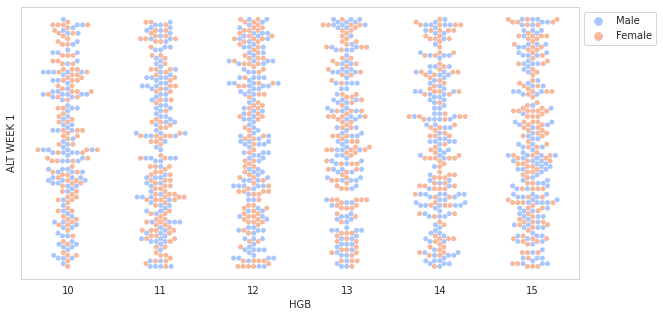

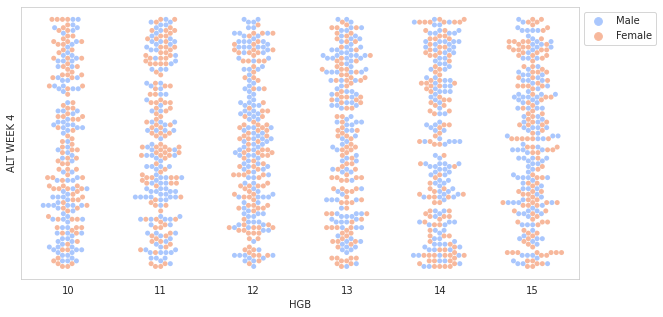

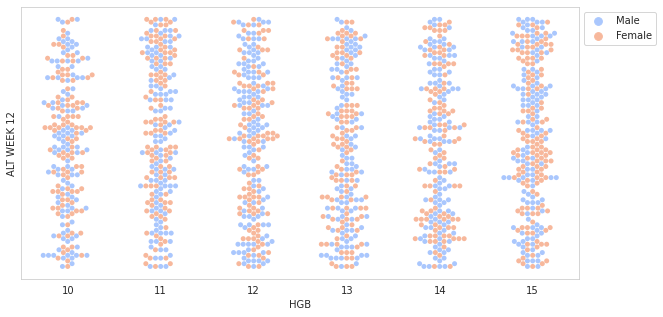

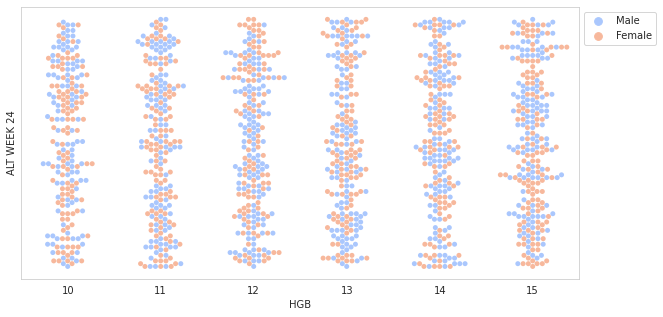

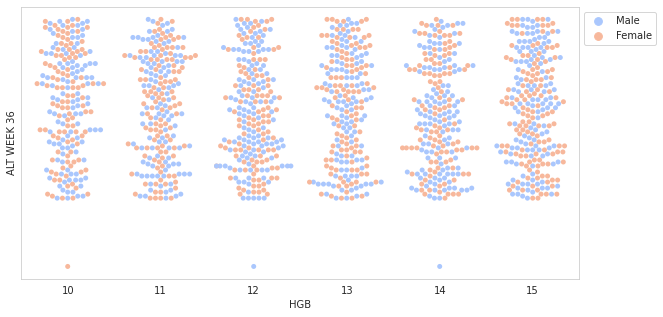

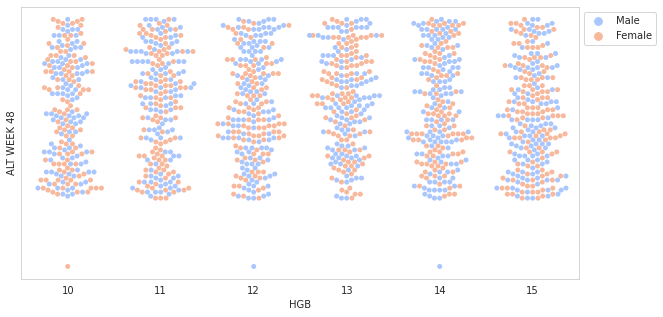

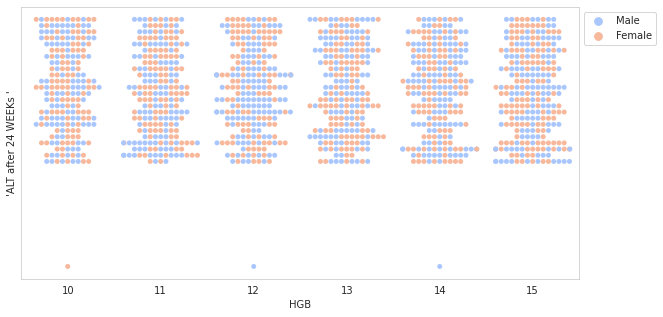

In [40]:
#ALT WEEKS V HGB
ALTSwarmPlot(data=ALTdata,x=data['HGB'],figsize=(10,5),hue=data_cat['Gender'],palette="coolwarm")

# ALT with Numerical Data

In [41]:
print("All numerical columns: \n",data.columns,'\n'*2)#Gender is included for better visualization
print("ALT weeks columns: \n",ALTdata.columns)

All numerical columns: 
 Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric_pain', 'WBC', 'RBC',
       'HGB', 'Plat', 'AST_1', 'ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36',
       'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA 4', 'RNA_12', 'RNA_EOT',
       'RNA_EF', 'Baseline_histological_Grading',
       'Baselinehistological_staging'],
      dtype='object') 


ALT weeks columns: 
 Index(['ALT WEEK 1', 'ALT WEEK 4', 'ALT WEEK 12', 'ALT WEEK 24', 'ALT WEEK 36',
       'ALT WEEK 48', ''ALT after 24 WEEKs ''],
      dtype='object')


<Figure size 576x360 with 0 Axes>

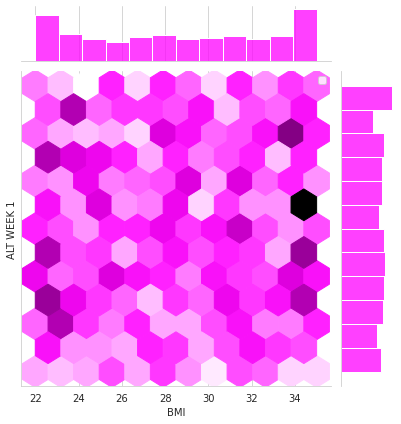

<Figure size 576x360 with 0 Axes>

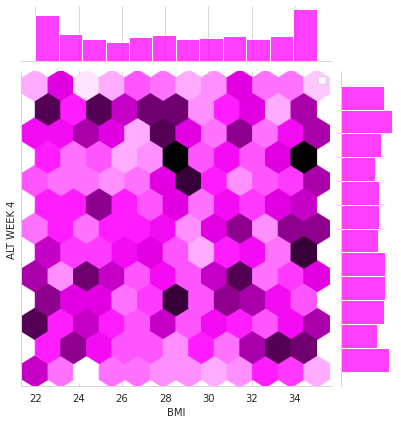

<Figure size 576x360 with 0 Axes>

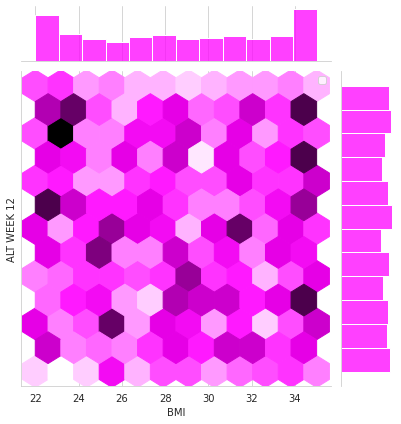

<Figure size 576x360 with 0 Axes>

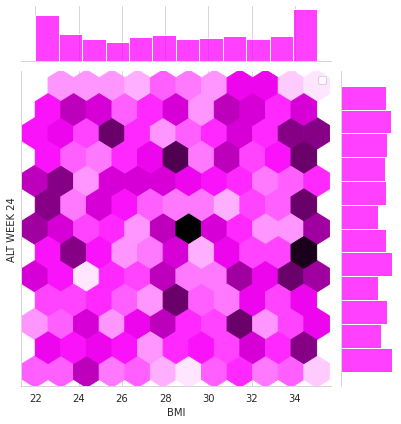

<Figure size 576x360 with 0 Axes>

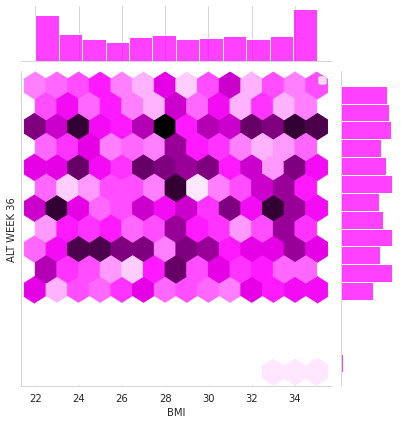

<Figure size 576x360 with 0 Axes>

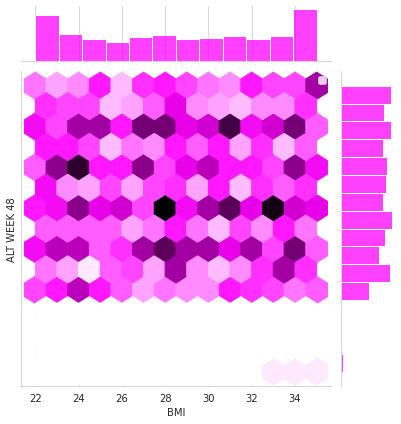

<Figure size 576x360 with 0 Axes>

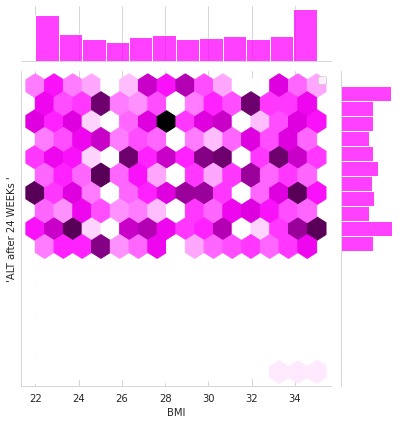

<Figure size 432x288 with 0 Axes>

In [42]:
#plot ALT WEEKS vs BMI:
def ALTHexPlot(data,x,figsize,color):
    for i, col in enumerate(ALTdata.columns):
        plt.figure(i,figsize=figsize)
        sns.jointplot(y=ALTdata[col],x=x,color=color,kind="hex")
        plt.yticks([])
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
ALTHexPlot(data=ALTdata,x=data['BMI'],figsize=((8,5)),color='magenta')
plt.savefig("ALT Vs BMI")

<Figure size 576x360 with 0 Axes>

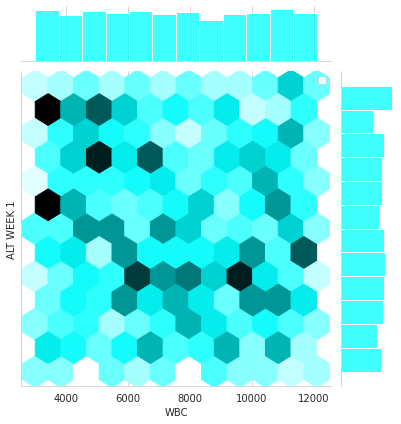

<Figure size 576x360 with 0 Axes>

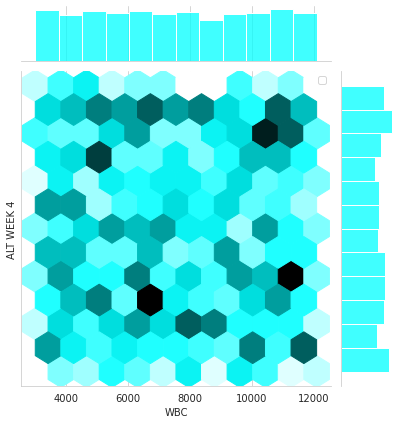

<Figure size 576x360 with 0 Axes>

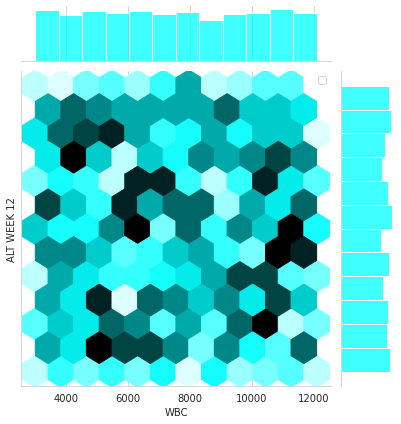

<Figure size 576x360 with 0 Axes>

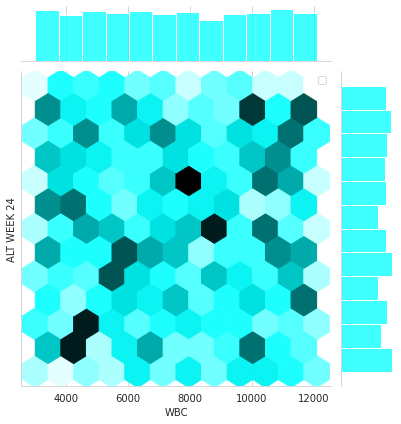

<Figure size 576x360 with 0 Axes>

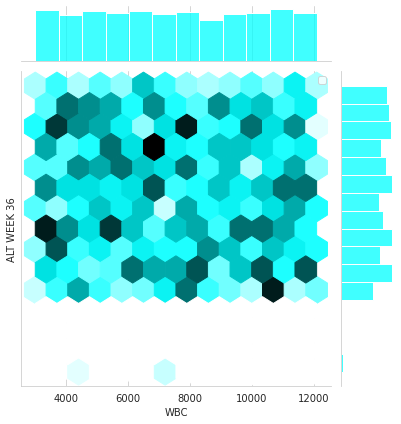

<Figure size 576x360 with 0 Axes>

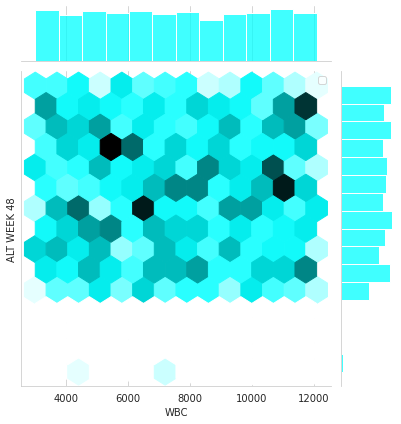

<Figure size 576x360 with 0 Axes>

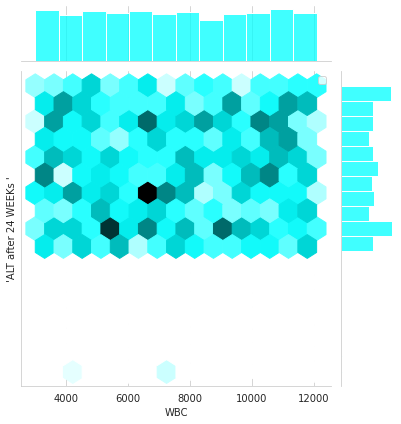

In [43]:
#ALT WEEKS VS WBCs
ALTHexPlot(data=ALTdata,x=data['WBC'],figsize=((8,5)),color='cyan')

<Figure size 576x360 with 0 Axes>

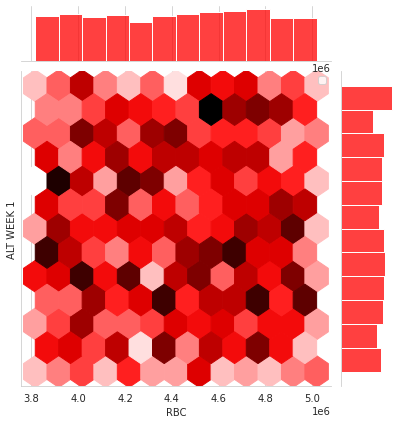

<Figure size 576x360 with 0 Axes>

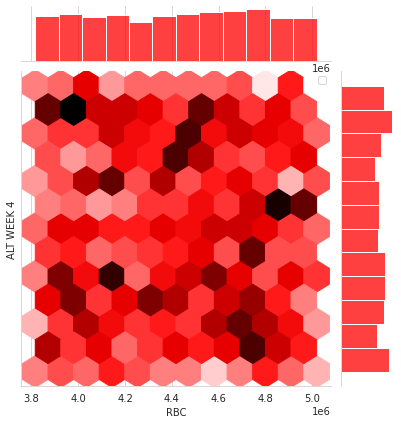

<Figure size 576x360 with 0 Axes>

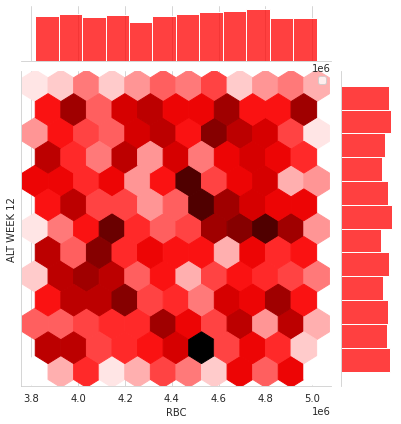

<Figure size 576x360 with 0 Axes>

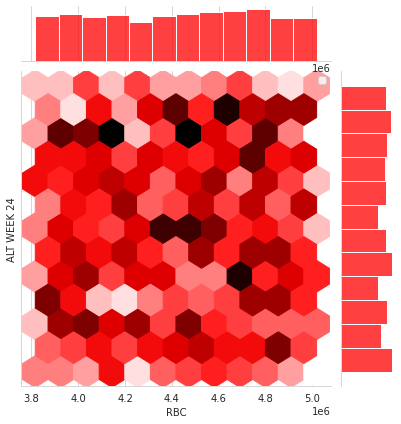

<Figure size 576x360 with 0 Axes>

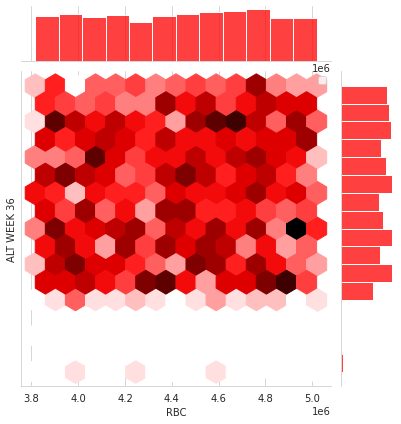

<Figure size 576x360 with 0 Axes>

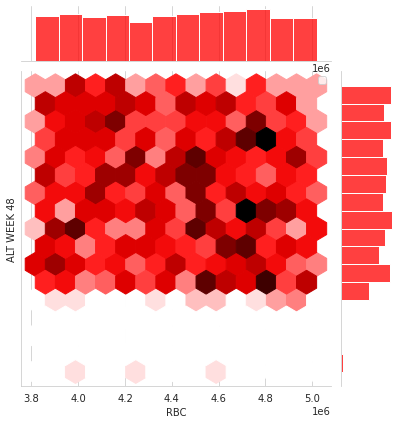

<Figure size 576x360 with 0 Axes>

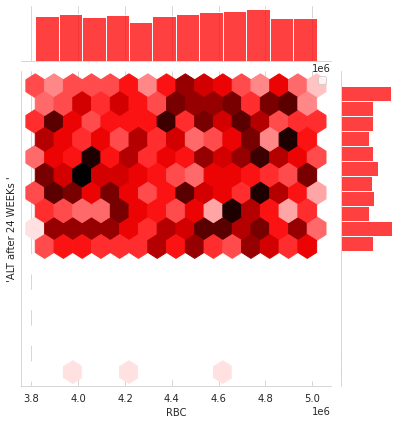

In [44]:
#ALT WEEKS VS WBCs
ALTHexPlot(data=ALTdata,x=data['RBC'],figsize=((8,5)),color='red')

In [45]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric_pain', 'WBC', 'RBC',
       'HGB', 'Plat', 'AST_1', 'ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36',
       'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA 4', 'RNA_12', 'RNA_EOT',
       'RNA_EF', 'Baseline_histological_Grading',
       'Baselinehistological_staging'],
      dtype='object')

<Figure size 576x360 with 0 Axes>

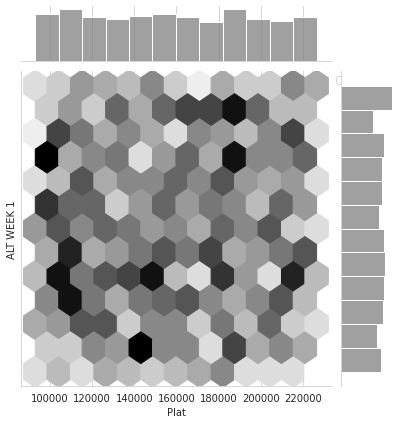

<Figure size 576x360 with 0 Axes>

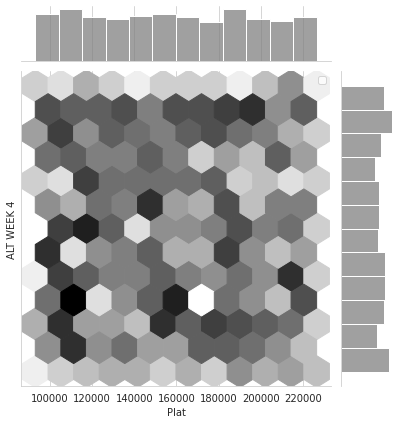

<Figure size 576x360 with 0 Axes>

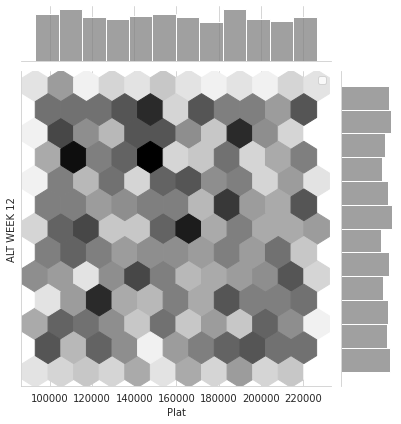

<Figure size 576x360 with 0 Axes>

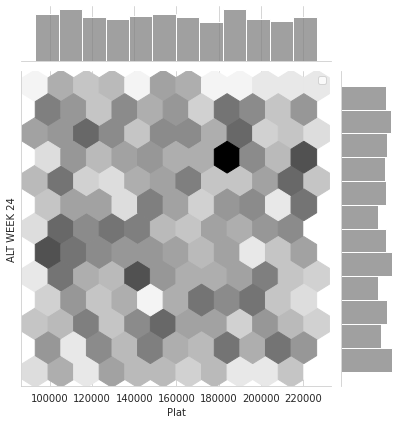

<Figure size 576x360 with 0 Axes>

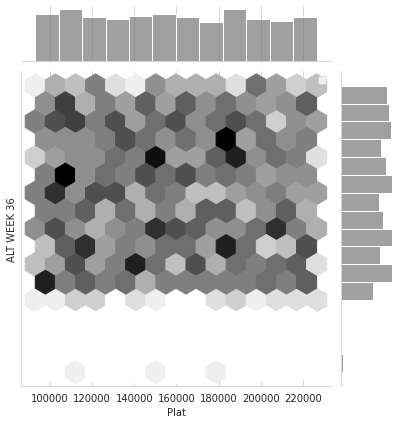

<Figure size 576x360 with 0 Axes>

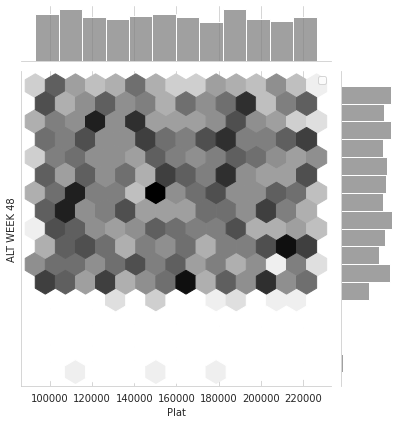

<Figure size 576x360 with 0 Axes>

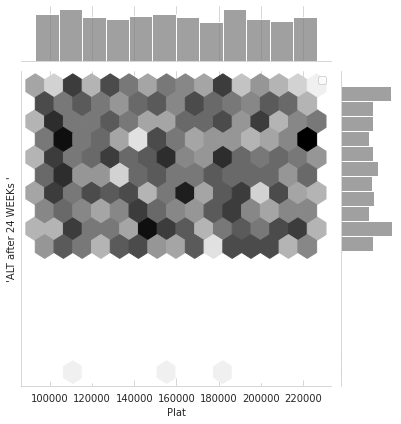

In [46]:
#ALT Weeks VS Platelets
ALTHexPlot(data=ALTdata,x=data['Plat'],figsize=((8,5)),color='gray')

# RNAs

In [47]:
RNAdata=data[['RNA_Base','RNA 4','RNA_12','RNA_EOT','RNA_EF']]
RNAdata.head()

RNA_Base   RNA 4   RNA_12  RNA_EOT  RNA_EF
0    655330  634536   288194        5       5
1     40620  538635   637056   336804   31085
2    571148  661346        5   735945  558829
3   1041941  449939   585688   744463  582301
4    660410  738756  3731527   338946  242861

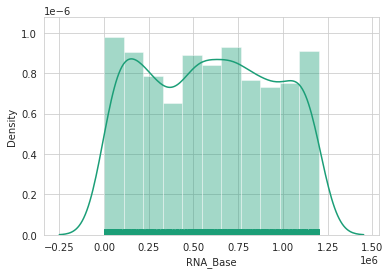

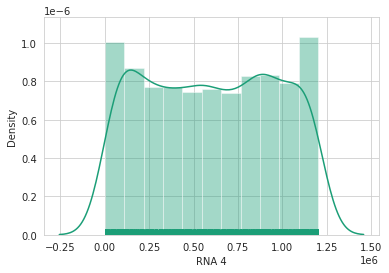

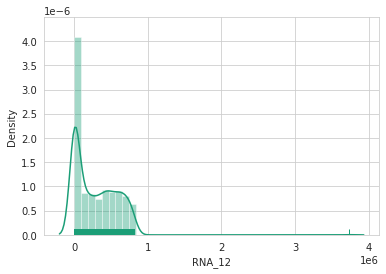

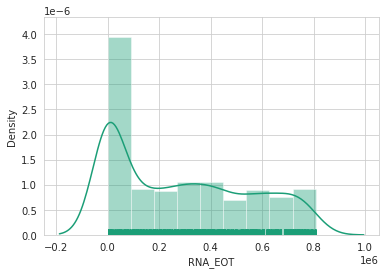

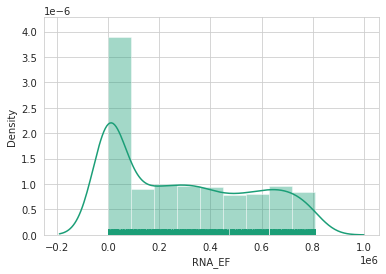

In [48]:
#Distribution of each RNA 
sns.set_palette(palette="Dark2")

for i, col in enumerate(RNAdata.columns):
    plt.figure(i)
    sns.distplot(RNAdata[col],rug=True)

In [49]:
#RNA at each Stage/Gradings.
def RNASwarmPlot(data,x,hue,figsize,palette):
    for i, col in enumerate(RNAdata.columns):
        plt.figure(i,figsize=figsize)
        sns.swarmplot(y=RNAdata[col],x=x,hue=hue,palette=palette)
        plt.legend(bbox_to_anchor=(1,1))
def RNABoxPlot(data,x,hue,figsize,palette):
    for i, col in enumerate(RNAdata.columns):
        plt.figure(i,figsize=figsize)
        sns.boxplot(y=RNAdata[col],x=x,hue=hue,palette=palette)
        plt.legend(bbox_to_anchor=(1,1))

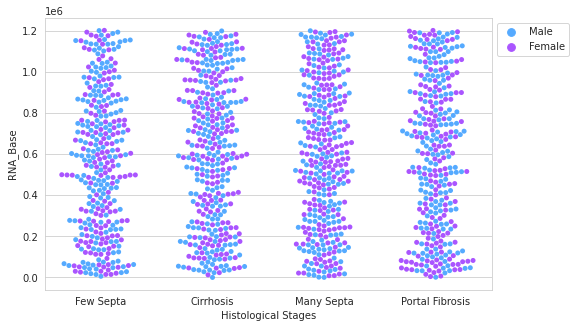

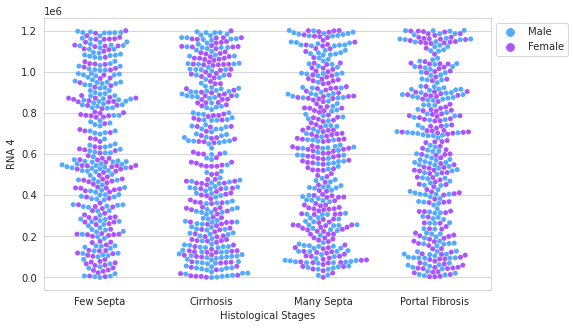

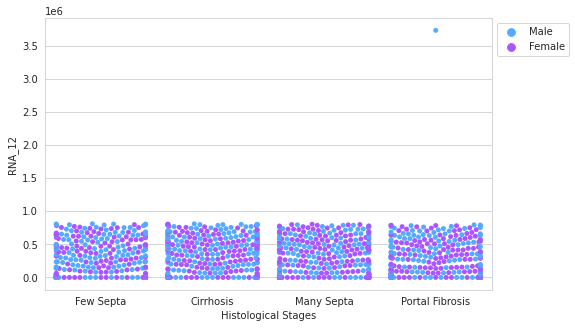

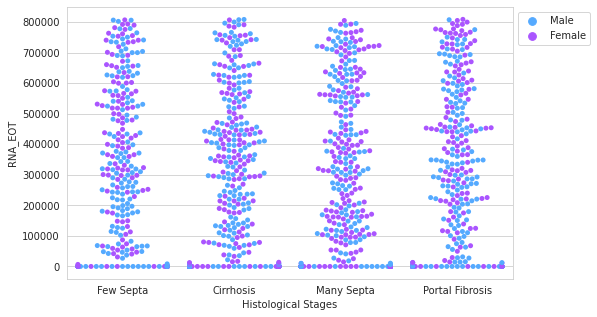

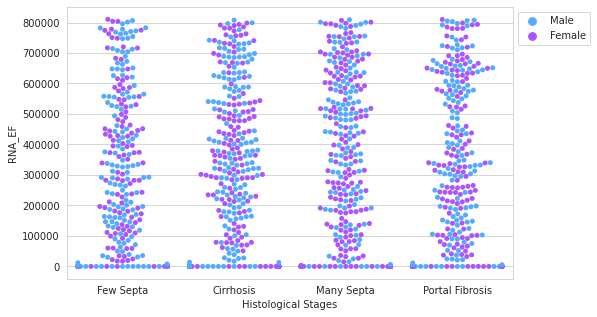

In [50]:
#RNA VS STAGES
RNASwarmPlot(data=data,x=data_cat['Histological Stages'],figsize=(8,5),palette="cool",hue=data_cat['Gender'])

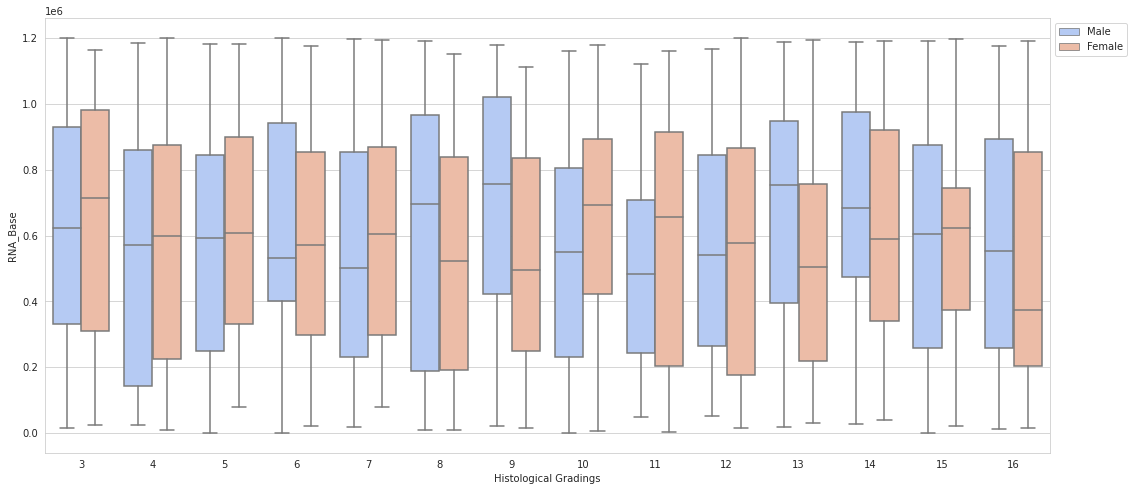

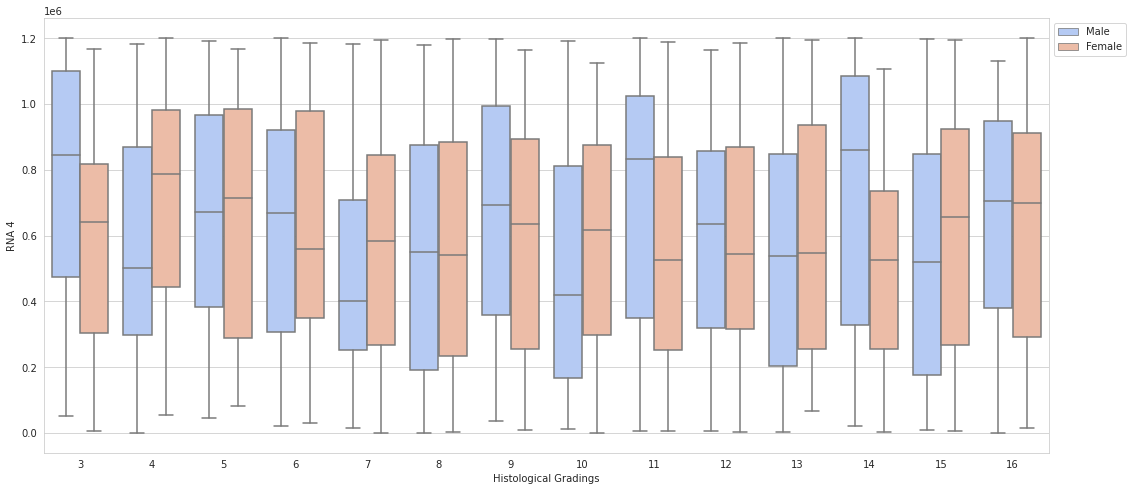

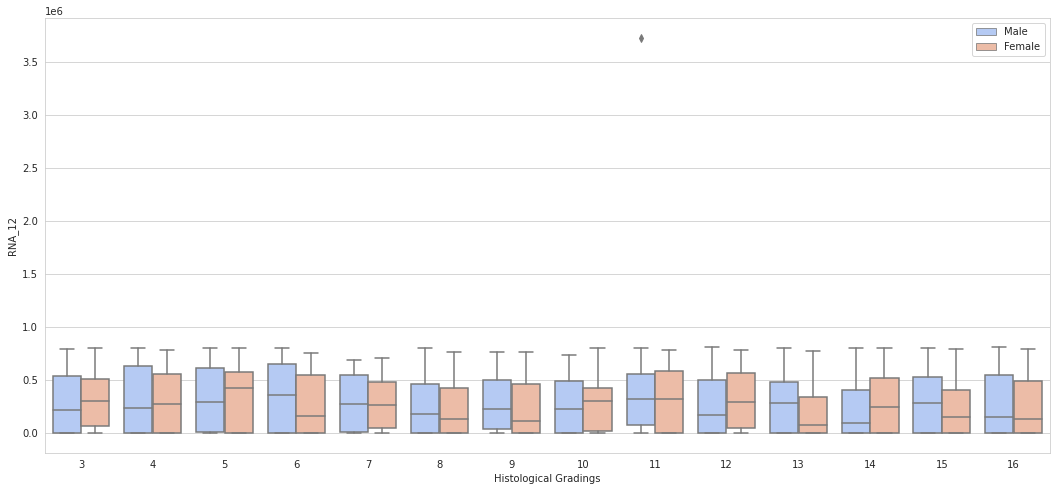

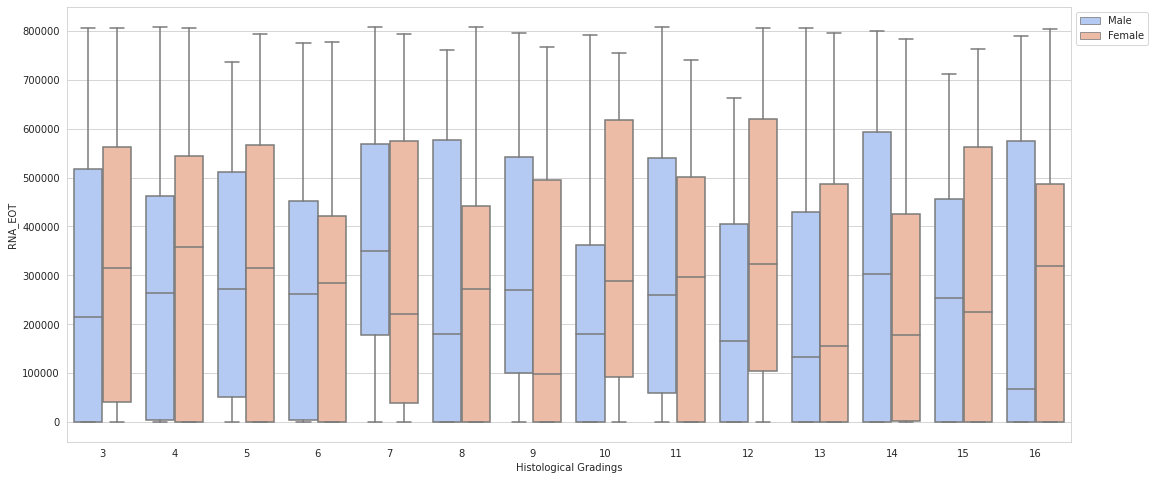

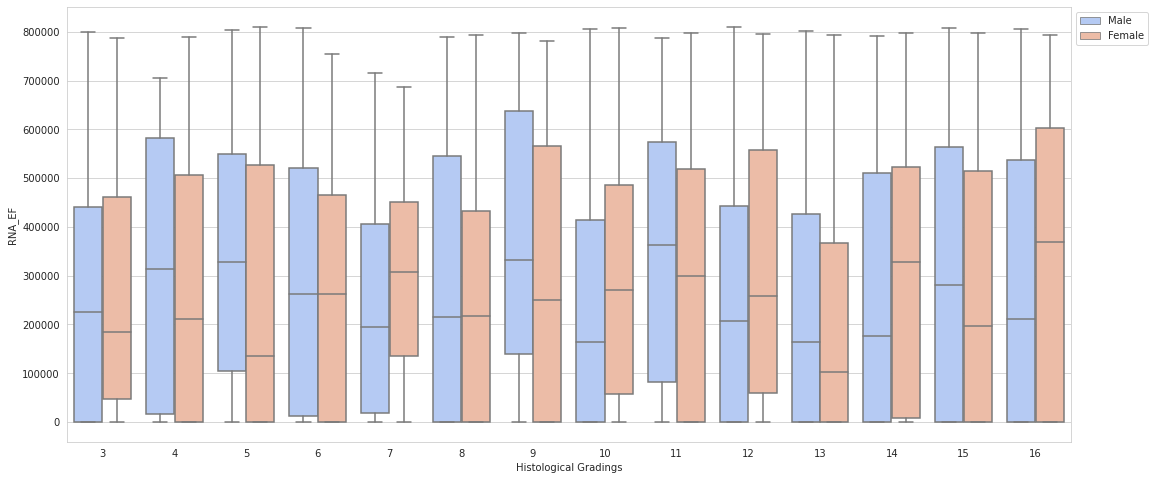

In [51]:
#RNA VS GRADINGS 
RNABoxPlot(data=data,x=data_cat['Histological Gradings'],figsize=(18,8),palette="coolwarm",hue=data_cat['Gender'])

In [52]:
data.head()

Age  Gender  BMI  Fever  Nausea/Vomting  Headache  Diarrhea  Fatigue  \
0   56       1   35      2               1         1         1        2   
1   46       1   29      1               2         2         1        2   
2   57       1   33      2               2         2         2        1   
3   49       2   33      1               2         1         2        1   
4   59       1   32      1               1         2         1        2   

   Jaundice  Epigastric_pain  ...  ALT_36  ALT_48  ALT_after_24w  RNA_Base  \
0         2                2  ...       5       5              5    655330   
1         2                1  ...      57     123             44     40620   
2         1                1  ...       5       5              5    571148   
3         2                1  ...      48      77             33   1041941   
4         2                2  ...      94      90             30    660410   

    RNA 4   RNA_12  RNA_EOT  RNA_EF  Baseline_histological_Grading  \
0  634536   288194        5       5                             13   
1  538635   637056   336804   31085                              4   
2  661346        5   735945  558829                              4   
3  449939   585688   744463  582301                             10   
4  738756  3731527   338946  242861                             11   

   Baselinehistological_staging  
0                             2  
1                             2  
2                             4  
3                             3  
4                             1  

[5 rows x 29 columns]

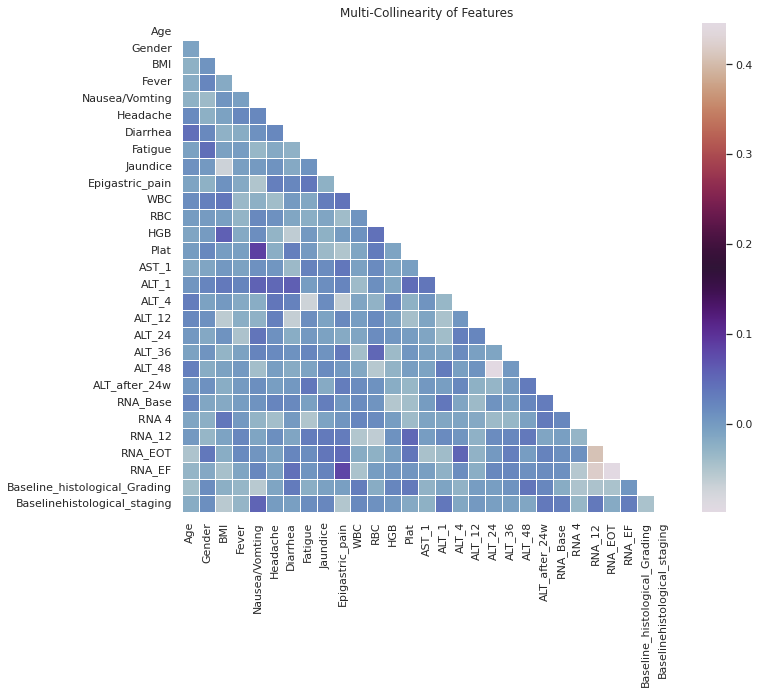

In [53]:
#Correlation heatmap matrix for numerical data

# Heatmap
sns.set(style="white")
# Create a correlation matrix
corr = data.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap="twilight",square=True, 
            linewidth=.5)
ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation.png')

# HGB level in the Histological Stages & Grading

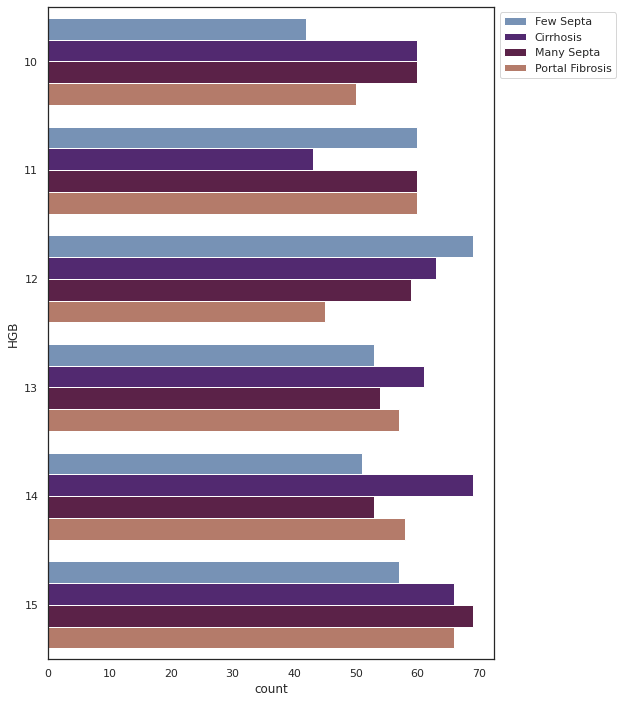

In [54]:
#stages
plt.figure(figsize=(8,12))

HGBStagingPlt=sns.countplot(y=data['HGB'],hue=data_cat['Baselinehistological_staging'],palette="twilight")

plt.legend(bbox_to_anchor=(1,1))
plt.show()

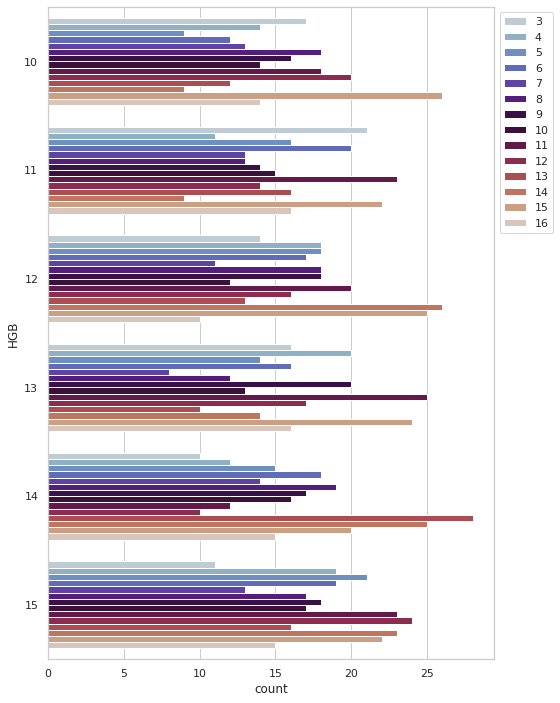

In [55]:
#Gradings
sns.set_style("whitegrid")
plt.figure(figsize=(8,12))

HGBGradingPlt=sns.countplot(y=data['HGB'],hue=data['Baseline_histological_Grading'],palette="twilight",saturation=6,)

plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Entire Dashboard

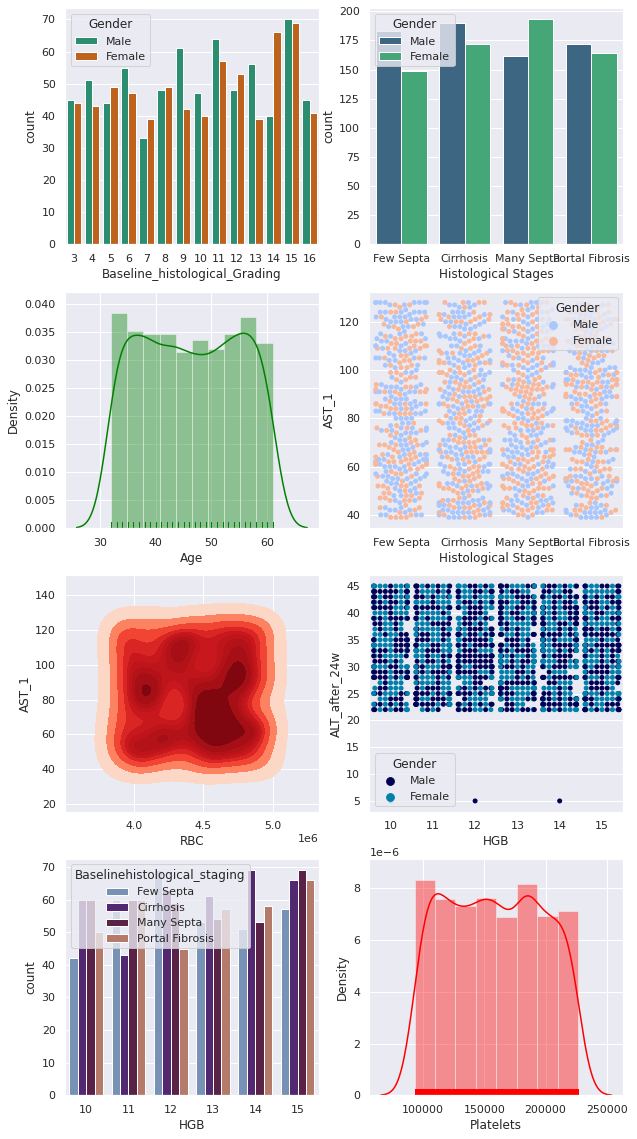

<Figure size 432x288 with 0 Axes>

In [56]:
#Dashboard
sns.set_style("darkgrid")
fig,axis=plt.subplots(4,2,figsize=(10,20))
k1=sns.countplot(x=data['Baseline_histological_Grading'],hue=data_cat['Gender'],palette="Dark2",ax=axis[0,0])
k2=sns.countplot(x=data_cat['Histological Stages'],hue=data_cat['Gender'],palette="viridis",ax=axis[0,1])
k3=sns.distplot(data['Age'],bins=10,label="Age",color="green",rug=True,ax=axis[1,0])
k4=sns.swarmplot(y=data['AST_1'],x=data_cat['Histological Stages'],hue=data_cat.Gender,palette="coolwarm",ax=axis[1,1])
k5=RBCASTplt=sns.kdeplot(data['RBC'],data['AST_1'],cmap="Reds",shade=True,shade_lowest=False,ax=axis[2,0])
k6=sns.swarmplot(y=data['ALT_after_24w'],x=data['HGB'],hue=data_cat.Gender,palette="ocean",ax=axis[2,1])
k7=HGBStagingPlt=sns.countplot(data['HGB'],hue=data_cat['Baselinehistological_staging'],palette="twilight",ax=axis[3,0])
k8=sns.distplot(data['Plat'],bins=8,axlabel="Platelets",rug=True,color='red',ax=axis[3,1])
plt.show()
plt.savefig("Dashboard.png")

# 2nd part: Prediction

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
df=data

In [14]:
df.head()

Age  Gender  BMI  Fever  Nausea/Vomting  Headache  Diarrhea  Fatigue  \
0   56       1   35      2               1         1         1        2   
1   46       1   29      1               2         2         1        2   
2   57       1   33      2               2         2         2        1   
3   49       2   33      1               2         1         2        1   
4   59       1   32      1               1         2         1        2   

   Jaundice  Epigastric_pain  ...  ALT_36  ALT_48  ALT_after_24w  RNA_Base  \
0         2                2  ...       5       5              5    655330   
1         2                1  ...      57     123             44     40620   
2         1                1  ...       5       5              5    571148   
3         2                1  ...      48      77             33   1041941   
4         2                2  ...      94      90             30    660410   

    RNA 4   RNA_12  RNA_EOT  RNA_EF  Baseline_histological_Grading  \
0  634536   288194        5       5                             13   
1  538635   637056   336804   31085                              4   
2  661346        5   735945  558829                              4   
3  449939   585688   744463  582301                             10   
4  738756  3731527   338946  242861                             11   

   Baselinehistological_staging  
0                             2  
1                             2  
2                             4  
3                             3  
4                             1  

[5 rows x 29 columns]

In [15]:
df['Baselinehistological_staging'].unique()

array([2, 4, 3, 1])

In [16]:
df['Baselinehistological_staging'].replace([1],[0],inplace=True)
df['Baselinehistological_staging'].replace([2],[1],inplace=True)
df['Baselinehistological_staging'].replace([3],[1],inplace=True)
df['Baselinehistological_staging'].replace([4],[1],inplace=True)

In [17]:
df['Baselinehistological_staging']

0       1
1       1
2       1
3       1
4       0
       ..
1380    1
1381    1
1382    1
1383    1
1384    1
Name: Baselinehistological_staging, Length: 1385, dtype: int64

In [19]:
robust_sc = preprocessing.RobustScaler()
standard_sc = preprocessing.StandardScaler() 
minmax_sc = preprocessing.MinMaxScaler()

In [20]:
X = df.drop(['Baselinehistological_staging'],axis=1)
y = df["Baselinehistological_staging"]

In [21]:
for x in [robust_sc,standard_sc,minmax_sc]:
    %time
    resultado = []
    scaler = x.fit(X)
    X_new = x.transform(X)
    tree = DecisionTreeClassifier(max_depth=25,random_state=42)
    tree.fit(X_new,y)
    y_pred = tree.predict(X_new)
    f1sc=f1_score(y, y_pred, average='weighted')
    rauc=(y, y_pred)
    resultado.append(f1sc)
    print("The scaling used--->",x)
    print("f1 according to the type of strategy:",f1sc)
    print("----------------------------------------")

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 13.1 μs
The scaling used---> RobustScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs
The scaling used---> StandardScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.67 μs
The scaling used---> MinMaxScaler()
f1 according to the type of strategy: 1.0
----------------------------------------


In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [23]:
over = SMOTE()
overs = RandomOverSampler()
under = RandomUnderSampler()
steps = [('o', over), ('os', overs),('u',under)]
pipeline = Pipeline(steps=steps)

In [24]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [25]:
X_train=standard_sc.fit_transform(X_train)
X_test=standard_sc.transform(X_test)

In [26]:
def confusion(y_test,y_test_pred,X):
    names=['Non Hepatitis','Hepatitis']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Machine Learning

In [27]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
score = RF.score(X_test,y_test)

In [28]:
score

0.6706730769230769

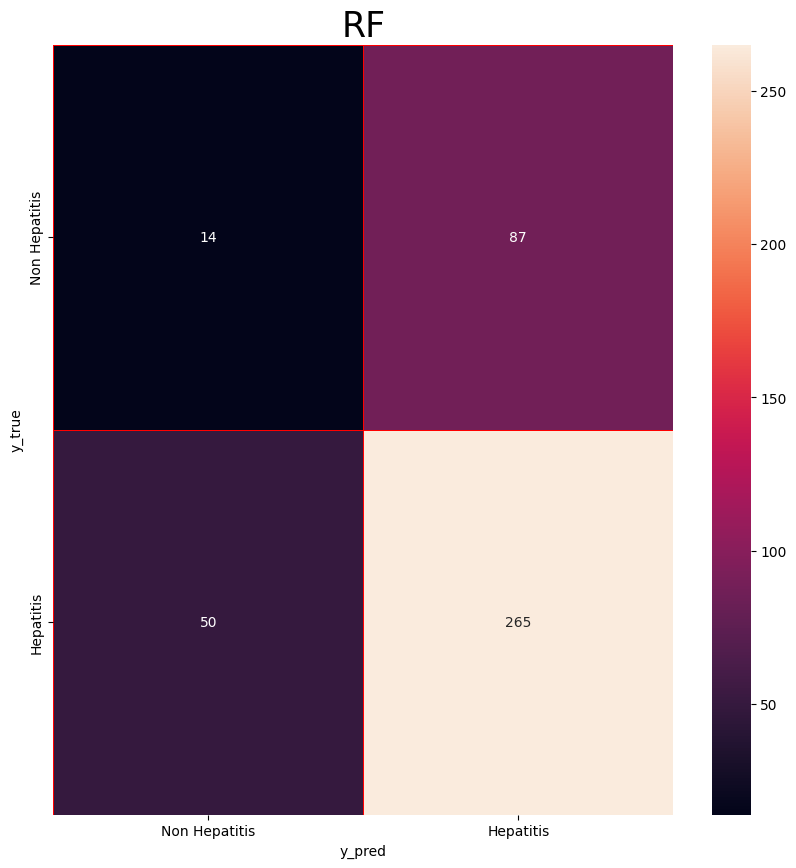

In [29]:
confusion(y_test,pred,"RF")

<Axes: >

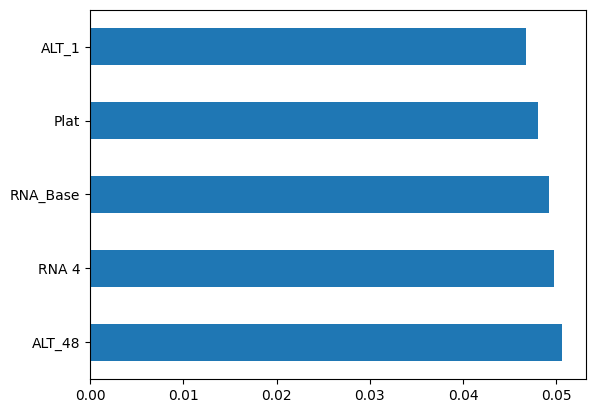

In [30]:
feat_importances = pd.Series(RF.feature_importances_, index=data.drop('Baselinehistological_staging',axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh')

[I 2024-12-20 18:42:51,341] A new study created in memory with name: no-name-db068bd8-6ed4-4fed-a891-58a4852ee5a5
[I 2024-12-20 18:42:52,001] Trial 0 finished with value: 0.4797108282256796 and parameters: {'max_depth': 20, 'n_estimators': 174, 'max_features': 10, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.4797108282256796.
[I 2024-12-20 18:42:53,706] Trial 1 finished with value: 0.4877259154486877 and parameters: {'max_depth': 9, 'n_estimators': 313, 'max_features': 19, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.4877259154486877.
[I 2024-12-20 18:42:54,270] Trial 2 finished with value: 0.4874430300172874 and parameters: {'max_depth': 4, 'n_estimators': 144, 'max_features': 26, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.4877259154486877.
[I 2024-12-20 18:42:57,124] Trial 3 finished with value: 0.4688983184032689 and parameters: {'max_depth': 11, 'n_estimators': 938, 'max_features'


Random Forest (No Optimization) Metrics:
Accuracy: 0.6851
Precision: 0.7556
Recall: 0.8635
AUC: 0.4369


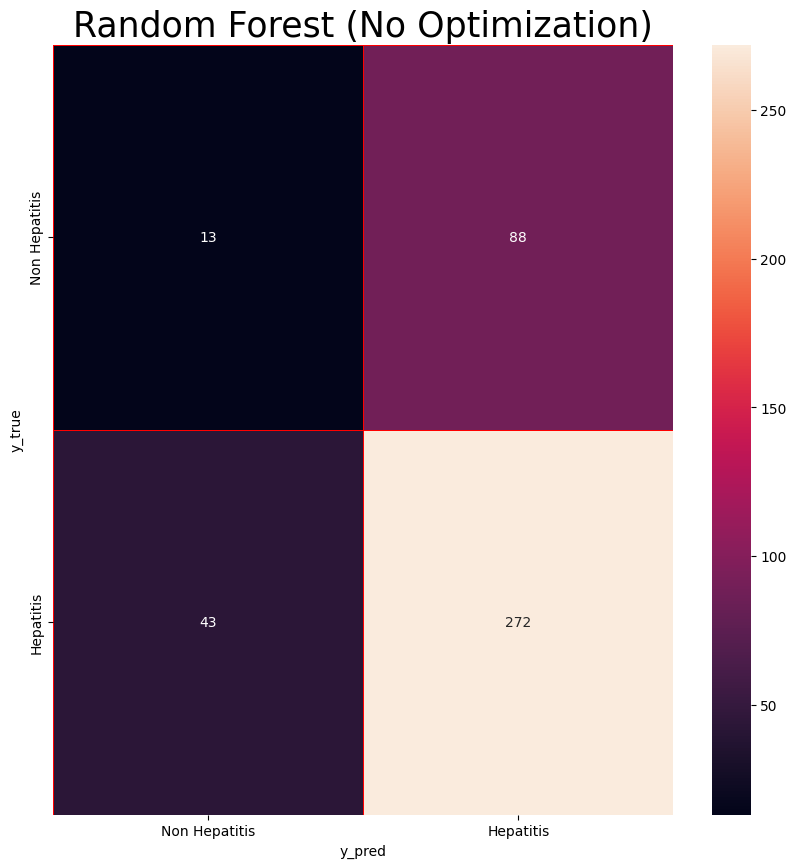


Random Forest (Optuna) Metrics:
Accuracy: 0.6827
Precision: 0.7683
Recall: 0.8317
AUC: 0.5030


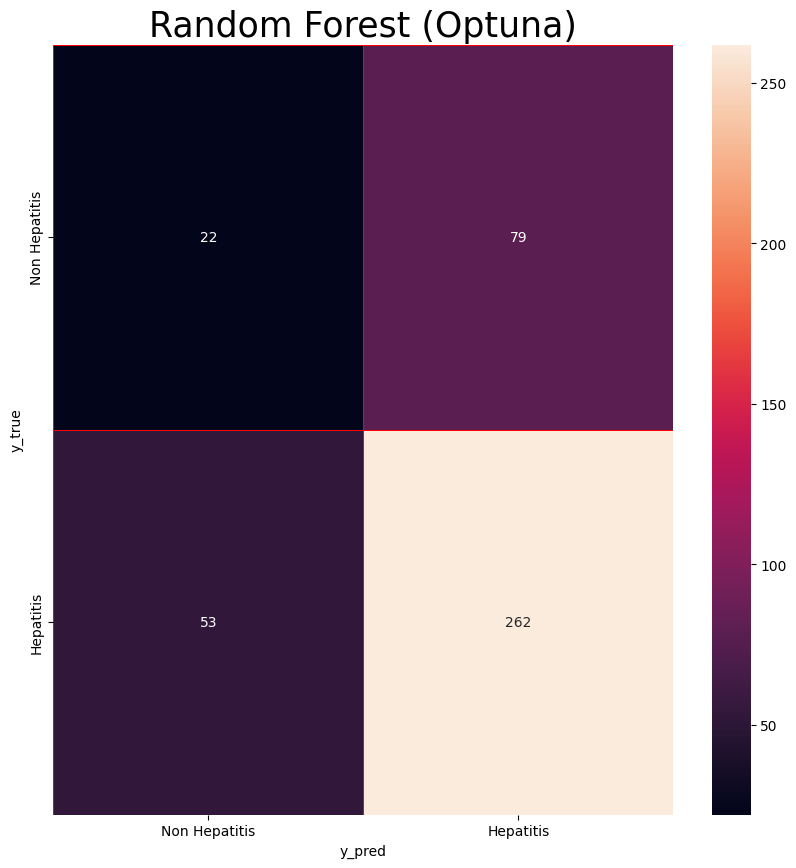


Random Forest (RandomSearch) Metrics:
Accuracy: 0.7019
Precision: 0.7588
Recall: 0.8889
AUC: 0.4558


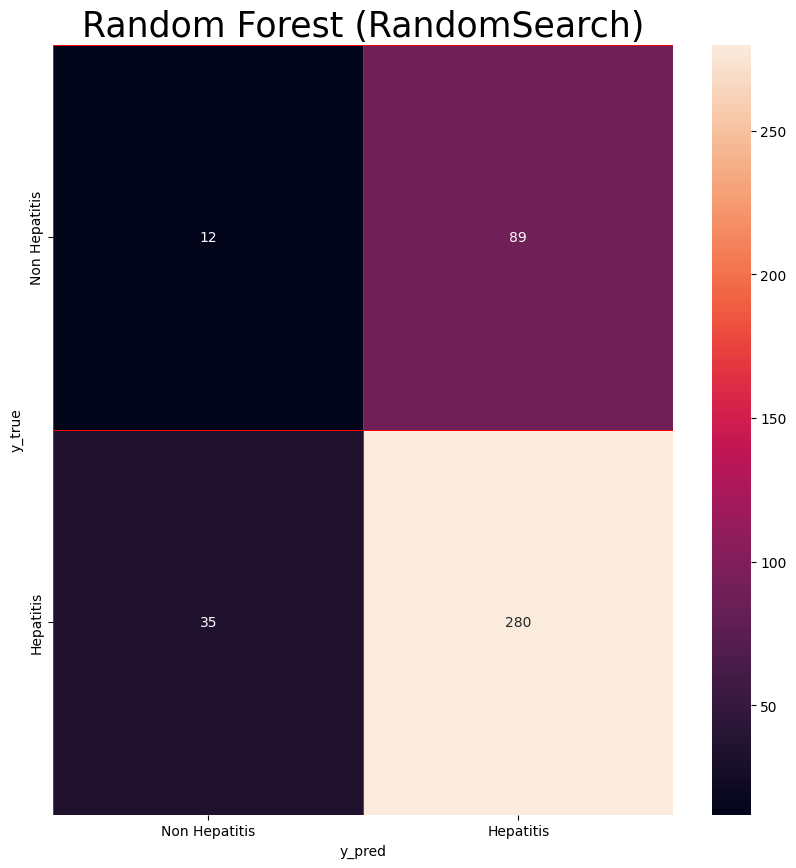

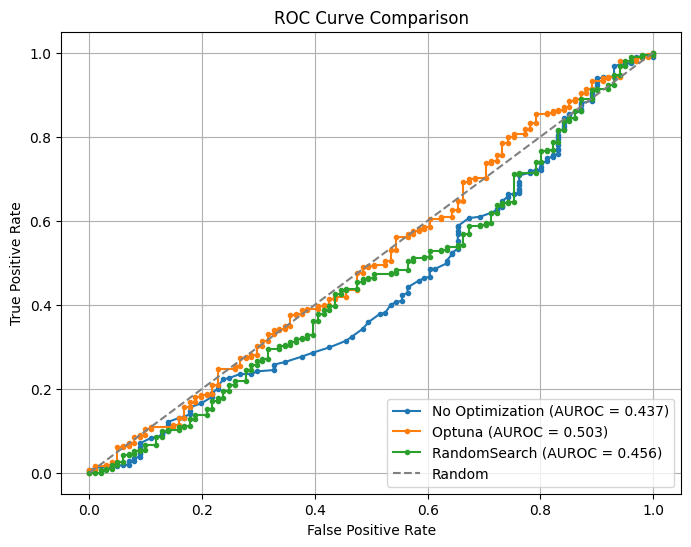

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import optuna

# Random Forest bez optymalizacji
rf_no_opt = RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)
rf_no_opt.fit(X_train, y_train)
y_pred_no_opt = rf_no_opt.predict(X_test)
rf_probs_no_opt = rf_no_opt.predict_proba(X_test)[:, 1]

# Optymalizacja za pomocą Optuny
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_features = trial.suggest_int('max_features', 1, X_train.shape[1])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    return roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params_optuna = study.best_params

rf_optuna = RandomForestClassifier(**best_params_optuna, random_state=42)
rf_optuna.fit(X_train, y_train)
y_pred_optuna = rf_optuna.predict(X_test)
rf_probs_optuna = rf_optuna.predict_proba(X_test)[:, 1]

# Optymalizacja za pomocą RandomizedSearchCV
param_dist = {
    'max_depth': range(3, 21),
    'n_estimators': range(100, 1001, 100),
    'max_features': range(1, X_train.shape[1] + 1),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), param_distributions=param_dist,
    n_iter=50, scoring='roc_auc', random_state=42, cv=3, n_jobs=-1
)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_

rf_random = RandomForestClassifier(**best_params_random, random_state=42)
rf_random.fit(X_train, y_train)
y_pred_random = rf_random.predict(X_test)
rf_probs_random = rf_random.predict_proba(X_test)[:, 1]

# Obliczenie metryk dla każdego modelu
def evaluate_model(y_true, y_pred, y_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba)
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc_score:.4f}")

    return auc_score

auc_no_opt = evaluate_model(y_test, y_pred_no_opt, rf_probs_no_opt, "Random Forest (No Optimization)")
confusion(y_test, y_pred_no_opt, "Random Forest (No Optimization)")

auc_optuna = evaluate_model(y_test, y_pred_optuna, rf_probs_optuna, "Random Forest (Optuna)")
confusion(y_test, y_pred_optuna, "Random Forest (Optuna)")

auc_random = evaluate_model(y_test, y_pred_random, rf_probs_random, "Random Forest (RandomSearch)")
confusion(y_test, y_pred_random, "Random Forest (RandomSearch)")

# Wykres ROC
fpr_no_opt, tpr_no_opt, _ = roc_curve(y_test, rf_probs_no_opt)
fpr_optuna, tpr_optuna, _ = roc_curve(y_test, rf_probs_optuna)
fpr_random, tpr_random, _ = roc_curve(y_test, rf_probs_random)

plt.figure(figsize=(8, 6))
plt.plot(fpr_no_opt, tpr_no_opt, marker='.', label=f'No Optimization (AUROC = {auc_no_opt:.3f})')
plt.plot(fpr_optuna, tpr_optuna, marker='.', label=f'Optuna (AUROC = {auc_optuna:.3f})')
plt.plot(fpr_random, tpr_random, marker='.', label=f'RandomSearch (AUROC = {auc_random:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## XGB

In [75]:
#needs gpu
gbm = XGBClassifier(verbosity=1)
params_xgb = {
        "n_estimators":[500,1000,1500],
        "learning_rate":[0.1,0.3,0.6],
        'gpu_id': [0],
        "predictor":["gpu_predictor"],
        'tree_method': ['gpu_hist'],
        "updater":["grow_gpu_hist"],
        "sampling_method":["gradient_based"],
        "updater":["grow_gpu_hist"]
}

In [76]:
#model_xgb = GridSearchCV(gbm,param_grid=params_xgb, cv=5,n_jobs=-1)
#model_xgb.fit(X_train,y_train)

In [77]:
#print("Best params: "+str(model_xgb.best_params_))
#print("Best Score: "+str(model_xgb.best_score_)+'\n')

In [78]:
#scores = pd.DataFrame(model_xgb.cv_results_)
#scores.sort_values(by="rank_test_score")

In [79]:
#y_train_pred_xgb = model_xgb.predict(X_train)
#y_test_pred_xgb = model_xgb.predict(X_test)

In [80]:
#print(classification_report(y_test, y_test_pred_xgb))

In [81]:
#confusion(y_test,y_test_pred_xgb,"XGB")

## MLP

In [82]:
clf = MLPClassifier(random_state=42)
params_MLP = {
        "hidden_layer_sizes":[64,128,256],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100,200],
        "warm_start":[True]
}

In [83]:
model_MLP = GridSearchCV(clf,param_grid=params_MLP, cv=3,n_jobs=-1)
model_MLP.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [64, 128, 256],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200],
                         'solver': ['lbfgs', 'sgd', 'adam'],
                         'warm_start': [True]})

In [84]:
print("Best params: "+str(model_MLP.best_params_))
print("Best Score: "+str(model_MLP.best_score_)+'\n')

Best params: {'activation': 'tanh', 'hidden_layer_sizes': 128, 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam', 'warm_start': True}
Best Score: 0.7753140520011685



In [85]:
scores = pd.DataFrame(model_MLP.cv_results_)
scores.sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
131       2.602348      0.018590         0.004701        0.000097   
137       2.683234      0.013697         0.004635        0.000053   
143       2.703372      0.060207         0.004984        0.000562   
149       4.452124      0.012596         0.007898        0.000202   
155       4.780568      0.179578         0.007993        0.000046   
..             ...           ...              ...             ...   
115       0.213981      0.054014         0.002729        0.000011   
61        0.130822      0.002137         0.001920        0.000029   
64        0.129873      0.005793         0.001865        0.000084   
169       0.185737      0.048287         0.001485        0.000007   
172       0.163598      0.015406         0.001473        0.000008   

    param_activation param_hidden_layer_sizes param_learning_rate  \
131             tanh                      128            constant   
137             tanh                      128          invscaling   
143             tanh                      128            adaptive   
149             tanh                      256            constant   
155             tanh                      256          invscaling   
..               ...                      ...                 ...   
115             tanh                       64          invscaling   
61          logistic                       64          invscaling   
64          logistic                       64          invscaling   
169             relu                       64          invscaling   
172             relu                       64          invscaling   

    param_max_iter param_solver param_warm_start  \
131            200         adam             True   
137            200         adam             True   
143            200         adam             True   
149            200         adam             True   
155            200         adam             True   
..             ...          ...              ...   
115            100          sgd             True   
61             100          sgd             True   
64             200          sgd             True   
169            100          sgd             True   
172            200          sgd             True   

                                                params  split0_test_score  \
131  {'activation': 'tanh', 'hidden_layer_sizes': 1...           0.614286   
137  {'activation': 'tanh', 'hidden_layer_sizes': 1...           0.614286   
143  {'activation': 'tanh', 'hidden_layer_sizes': 1...           0.614286   
149  {'activation': 'tanh', 'hidden_layer_sizes': 2...           0.630612   
155  {'activation': 'tanh', 'hidden_layer_sizes': 2...           0.630612   
..                                                 ...                ...   
115  {'activation': 'tanh', 'hidden_layer_sizes': 6...           0.495918   
61   {'activation': 'logistic', 'hidden_layer_sizes...           0.500000   
64   {'activation': 'logistic', 'hidden_layer_sizes...           0.500000   
169  {'activation': 'relu', 'hidden_layer_sizes': 6...           0.495918   
172  {'activation': 'relu', 'hidden_layer_sizes': 6...           0.495918   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
131           0.854806           0.856851         0.775314        0.113867   
137           0.854806           0.856851         0.775314        0.113867   
143           0.854806           0.856851         0.775314        0.113867   
149           0.852761           0.834356         0.772576        0.100665   
155           0.852761           0.834356         0.772576        0.100665   
..                 ...                ...              ...             ...   
115           0.503067           0.550102         0.516363        0.024035   
61            0.498978           0.501022         0.500000        0.000835   
64            0.498978           0.501022         0.500000        0.000835   
169           0.4

In [86]:
y_train_pred_MLP = model_MLP.predict(X_train)
y_test_pred_MLP = model_MLP.predict(X_test)

In [87]:
print(classification_report(y_test, y_test_pred_MLP))

              precision    recall  f1-score   support

           0       0.19      0.18      0.18       101
           1       0.74      0.76      0.75       315

    accuracy                           0.62       416
   macro avg       0.47      0.47      0.47       416
weighted avg       0.61      0.62      0.61       416



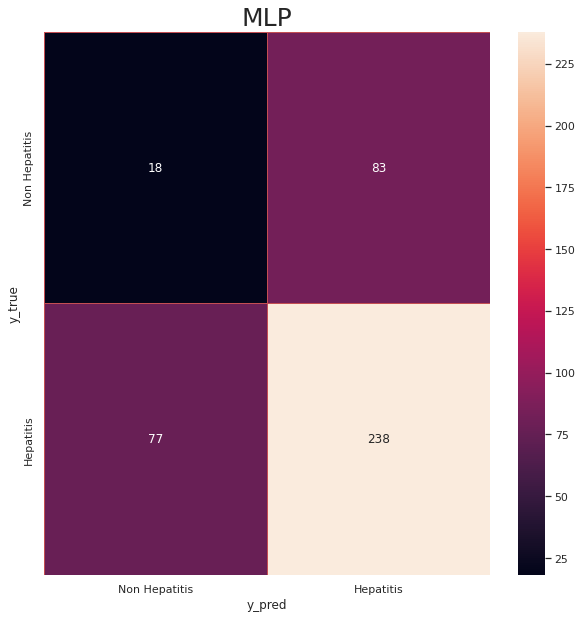

In [88]:
confusion(y_test,y_test_pred_MLP,"MLP")

## Random Forest

In [89]:
clf = RandomForestClassifier(random_state=42)
params_RF = {
        "max_depth":[250,500,1000],
        "criterion":["gini", "entropy"],
        'min_samples_split': [2,4,6],
        "min_samples_leaf":[1,2,3],
        "max_features":['auto', 'sqrt', 'log2'],
        'warm_start':[True],
        'class_weight':['balanced', 'balanced_subsample']
}

In [90]:
model_RF = GridSearchCV(clf,param_grid=params_RF, cv=3,n_jobs=-1)
model_RF.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [250, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6], 'warm_start': [True]})

In [91]:
print("Best params: "+str(model_RF.best_params_))
print("Best Score: "+str(model_RF.best_score_)+'\n')

Best params: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 250, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'warm_start': True}
Best Score: 0.8141605108300989



In [92]:
scores = pd.DataFrame(model_RF.cv_results_)
scores.sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
190       0.620956      0.005953         0.029973        0.000210   
217       0.615949      0.001921         0.029400        0.001357   
172       0.617282      0.003415         0.030354        0.000215   
199       0.623751      0.003198         0.028516        0.001109   
226       0.621651      0.015181         0.028367        0.000843   
..             ...           ...              ...             ...   
120       0.601877      0.009233         0.029958        0.001155   
84        0.651179      0.027787         0.054960        0.022084   
85        0.686215      0.039746         0.033320        0.007256   
94        0.623094      0.007767         0.028218        0.001104   
112       0.609130      0.005651         0.028471        0.001628   

     param_class_weight param_criterion param_max_depth param_max_features  \
190  balanced_subsample            gini             500               auto   
217  balanced_subsample            gini            1000               auto   
172  balanced_subsample            gini             250               sqrt   
199  balanced_subsample            gini             500               sqrt   
226  balanced_subsample            gini            1000               sqrt   
..                  ...             ...             ...                ...   
120            balanced         entropy             500               sqrt   
84             balanced         entropy             250               auto   
85             balanced         entropy             250               auto   
94             balanced         entropy             250               sqrt   
112            balanced         entropy             500               auto   

    param_min_samples_leaf param_min_samples_split param_warm_start  \
190                      1                       4             True   
217                      1                       4             True   
172                      1                       4             True   
199                      1                       4             True   
226                      1                       4             True   
..                     ...                     ...              ...   
120                      2                       2             True   
84                       2                       2             True   
85                       2                       4             True   
94                       2                       4             True   
112                      2                       4             True   

                                                params  split0_test_score  \
190  {'class_weight': 'balanced_subsample', 'criter...           0.626531   
217  {'class_weight': 'balanced_subsample', 'criter...           0.626531   
172  {'class_weight': 'balanced_subsample', 'criter...           0.626531   
199  {'class_weight': 'balanced_subsample', 'criter...           0.626531   
226  {'class_weight': 'balanced_subsample', 'criter...           0.626531   
..                                                 ...                ...   
120  {'class_weight': 'balanced', 'criterion': 'ent...           0.597959   
84   {'class_weight': 'balanced', 'criterion': 'ent...           0.597959   
85   {'class_weight': 'balanced', 'criterion': 'ent...           0.597959   
94   {'class_weight': 'balanced', 'criterion': 'ent...           0.597959   
112  {'class_weight': 'balanced', 'criterion': 'ent...           0.597959   

     split1_test_score  split2_test_score  mean_test_score  std_test_score  \
190           0.918200           0.897751         0.814161        0.132937   
217           0.918200           0.897751         0.814161        0.132937   
172           0.918200           0.897751         0.814161        0.132937   
199           0.918200           0.897751         0.814161        0.132937   
226           0.918200           0.897751         0.814161        0.132

In [93]:
y_train_pred_RF = model_RF.predict(X_train)
y_test_pred_RF = model_RF.predict(X_test)

In [94]:
print(classification_report(y_test, y_test_pred_RF))

              precision    recall  f1-score   support

           0       0.23      0.14      0.17       101
           1       0.76      0.85      0.80       315

    accuracy                           0.68       416
   macro avg       0.49      0.50      0.49       416
weighted avg       0.63      0.68      0.65       416



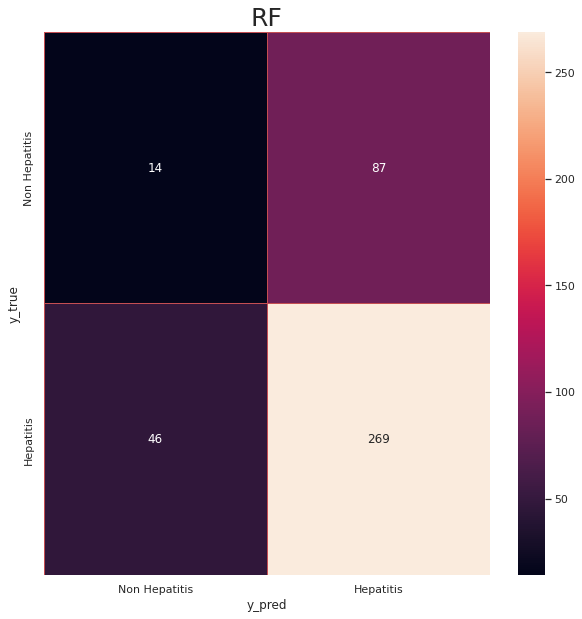

In [95]:
confusion(y_test,y_test_pred_RF,"RF")